In [1]:
# 📌 Downlink features
DL_FEATURES = [
    'NR_UE_Throughput_PDCP_DL', 'NR_UE_PCI_0', 'NR_UE_RB_Num_DL_0',
    'NR_UE_Pathloss_DL_0', 'App_Throughput_DL', 'NR_UE_Power_Tx_PUSCH_0',
    'NR_UE_RSRP_0', 'NR_UE_BLER_DL_0', 'NR_UE_NACK_Rate_DL_0',
    'NR_UE_NACK_Rate_UL_0', 'NR_UE_Ack_As_Nack_DL_0', 'NR_UE_Nbr_RSRP_0',
    'NR_UE_Nbr_PCI_0', 'NR_UE_SINR_0', 'NR_UE_RSRQ_0', 'NR_UE_Nbr_RSRQ_0',
    'NR_UE_Nbr_PCI_1', 'NR_UE_Nbr_PCI_2', 'NR_UE_Timing_Advance','NR_UE_Nbr_RSRP_1', 'NR_UE_Nbr_RSRP_2'
]

# 📌 Uplink features
UL_FEATURES = [
    'NR_UE_Throughput_RLC_UL', 'NR_UE_PCI_0', 'NR_UE_Power_Tx_PUSCH_0',
    'App_Throughput_UL', 'NR_UE_NACK_Rate_UL_0', 'NR_UE_RSRP_0',
    'NR_UE_Nbr_PCI_0', 'NR_UE_RSRQ_0', 'NR_UE_Nbr_RSRP_0',
    'NR_UE_Nbr_RSRQ_0', 'NR_UE_Nbr_RSRP_1', 'NR_UE_SINR_0',
    'NR_UE_Nbr_PCI_1', 'NR_UE_Nbr_RSRQ_1', 'NR_UE_Timing_Advance'
]

# 📌 Scanner features
SCAN_FEATURES = [
    'NR_Scan_PCI_SortedBy_RSRP_0', 'NR_Scan_PCI_SortedBy_RSRP_1',
    'NR_Scan_SSB_RSRP_SortedBy_RSRP_0', 'NR_Scan_SSB_RSRP_SortedBy_RSRP_2',
    'NR_Scan_SSB_RSRP_SortedBy_RSRP_1', 'NR_Scan_NR_ARFCN',
    'NR_Scan_SSB_RSRQ_SortedBy_RSRP_0', 'NR_Scan_SSB_SINR_SortedBy_RSRP_0',
    'NR_Scan_SSB_RSRQ_SortedBy_RSRP_2', 'NR_Scan_SSB_SINR_SortedBy_RSRP_2',
    'NR_Scan_PCI_SortedBy_RSRP_2', 'NR_Scan_SSB_SINR_SortedBy_RSRP_1',
    'NR_Scan_SSB_RSRQ_SortedBy_RSRP_1'
]


In [2]:
import pandas as pd


In [3]:
import pandas as pd
import os

RAW_DATA_DIR = "../data/raw"

# Load DL data
dl1 = pd.read_excel(os.path.join(RAW_DATA_DIR, "v1_5G_DL.xlsx"), sheet_name="Series Formatted Data")
dl2 = pd.read_excel(os.path.join(RAW_DATA_DIR, "v2_5G_DL.xlsx"), sheet_name="Series Formatted Data")


dl = pd.concat([dl1, dl2], ignore_index=True)
dl = dl[["Latitude", "Longitude"] + DL_FEATURES].dropna(subset=["Latitude", "Longitude"])
dl["loc_key"] = dl["Latitude"].round(5).astype(str) + "_" + dl["Longitude"].round(5).astype(str)

dl.head()


,Latitude,Longitude,NR_UE_Throughput_PDCP_DL,NR_UE_PCI_0,NR_UE_RB_Num_DL_0,NR_UE_Pathloss_DL_0,App_Throughput_DL,NR_UE_Power_Tx_PUSCH_0,NR_UE_RSRP_0,NR_UE_BLER_DL_0,...,NR_UE_Nbr_PCI_0,NR_UE_SINR_0,NR_UE_RSRQ_0,NR_UE_Nbr_RSRQ_0,NR_UE_Nbr_PCI_1,NR_UE_Nbr_PCI_2,NR_UE_Timing_Advance,NR_UE_Nbr_RSRP_1,NR_UE_Nbr_RSRP_2,loc_key
2,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
3,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
4,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
5,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
6,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949


In [4]:
len(dl)

215899

In [5]:
# Drop rows with all signal-related columns missing
signal_cols = [
    'NR_UE_RSRP_0', 'NR_UE_SINR_0', 'NR_UE_RSRQ_0',
    'NR_UE_Throughput_PDCP_DL', 'NR_UE_Pathloss_DL_0', 'App_Throughput_DL'
]
dl = dl.dropna(subset=signal_cols, how='all')

# Define "useless signal" logic
def is_useless_signal(row):
    critical_cols = [
        "NR_UE_RSRP_0", "NR_UE_SINR_0", "NR_UE_RSRQ_0",
        "NR_UE_Nbr_RSRP_0", "NR_UE_Nbr_RSRP_1", "NR_UE_Nbr_RSRP_2"
    ]
    if row[critical_cols].isna().all():
        return True
    if pd.notna(row["NR_UE_RSRP_0"]) and pd.notna(row["NR_UE_SINR_0"]):
        if (row["NR_UE_RSRP_0"] < -125) and (row["NR_UE_SINR_0"] < -5):
            return True
    return False

dl["bad_signal"] = dl.apply(is_useless_signal, axis=1)
dl = dl[~dl["bad_signal"]].copy()
dl.drop(columns="bad_signal", inplace=True)

print(f"✅ Remaining after signal filtering: {len(dl)} rows")


✅ Remaining after signal filtering: 5746 rows


In [6]:
def load_base_station_config() -> pd.DataFrame:
    path = os.path.join(RAW_DATA_DIR, "İTÜ 5G Hücre Bilgileri.xlsx")
    df = pd.read_excel(path, sheet_name="Hücre tablosu")

    col_map = {}
    for col in df.columns:
        lower = col.lower()
        if "latitude" in lower:
            col_map[col] = "lat"
        elif "longitude" in lower:
            col_map[col] = "lon"
        elif "azimuth" in lower:
            col_map[col] = "azimuth"
        elif "height" in lower:
            col_map[col] = "height"
        elif "pci" in lower:
            col_map[col] = "pci"

    df.rename(columns=col_map, inplace=True)
    needed_columns = ["lat", "lon", "azimuth", "height", "pci"]
    df = df[[col for col in needed_columns if col in df.columns]]
    return df

def convert_pci(df):
    coord = load_base_station_config()
    pci_columns = [col for col in df.columns if 'PCI' in col]

    for pci_col in pci_columns:
        if pci_col not in df.columns:
            continue

        df[pci_col] = pd.to_numeric(df[pci_col], errors='coerce').astype('Int64')

        merge_df = coord.rename(columns={
            'lat': f'{pci_col}_lat',
            'lon': f'{pci_col}_lon',
            'azimuth': f'{pci_col}_azimuth',
            'height': f'{pci_col}_height',
            'pci': pci_col
        })

        df = df.merge(merge_df, how='left', on=pci_col)
        df[f'{pci_col}_bs_found'] = ~df[f'{pci_col}_lat'].isna()

    return df


In [7]:
dl = convert_pci(dl)
print(f"✅ PCI-to-BS coordinate enrichment complete. Example columns: {[col for col in dl.columns if '_lat' in col]}")


✅ PCI-to-BS coordinate enrichment complete. Example columns: ['NR_UE_PCI_0_lat', 'NR_UE_Nbr_PCI_0_lat', 'NR_UE_Nbr_PCI_1_lat', 'NR_UE_Nbr_PCI_2_lat']


In [8]:
import numpy as np

In [9]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # meters
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

def bearing_from_bs_to_ue(bs_lat, bs_lon, ue_lat, ue_lon):
    lat1, lon1, lat2, lon2 = map(np.radians, [bs_lat, bs_lon, ue_lat, ue_lon])
    dlon = lon2 - lon1
    x = np.sin(dlon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(dlon)
    return (np.degrees(np.arctan2(x, y)) + 360) % 360


In [10]:
def apply_geometry_features(df, pci_col_base="NR_UE_PCI_0"):
    bs_lat = df[f"{pci_col_base}_lat"]
    bs_lon = df[f"{pci_col_base}_lon"]
    bs_azimuth = df[f"{pci_col_base}_azimuth"]
    ue_lat = df["Latitude"]
    ue_lon = df["Longitude"]

    df[f"{pci_col_base}_distance"] = haversine_distance(bs_lat, bs_lon, ue_lat, ue_lon)
    df[f"{pci_col_base}_bearing"] = bearing_from_bs_to_ue(bs_lat, bs_lon, ue_lat, ue_lon)
    delta_angle = np.abs(df[f"{pci_col_base}_bearing"] - bs_azimuth)
    df[f"{pci_col_base}_angle_offset"] = np.minimum(delta_angle, 360 - delta_angle)
    df[f"{pci_col_base}_cos_offset"] = np.cos(np.radians(df[f"{pci_col_base}_angle_offset"]))

    rsrp_col = f"{pci_col_base.replace('PCI', 'RSRP')}"
    if rsrp_col in df.columns:
        df[f"{pci_col_base}_rsrp_weighted"] = df[rsrp_col] * df[f"{pci_col_base}_cos_offset"]

    return df


In [11]:
for pci_base in ["NR_UE_PCI_0", "NR_UE_Nbr_PCI_0", "NR_UE_Nbr_PCI_1", "NR_UE_Nbr_PCI_2"]:
    if f"{pci_base}_lat" in dl.columns:
        dl = apply_geometry_features(dl, pci_base)

print("✅ Geometry features added.")


✅ Geometry features added.


In [13]:
pci_rsrp_map = {
    "NR_UE_PCI_0": "NR_UE_RSRP_0",
    "NR_UE_Nbr_PCI_0": "NR_UE_Nbr_RSRP_0",
    "NR_UE_Nbr_PCI_1": "NR_UE_Nbr_RSRP_1",
    "NR_UE_Nbr_PCI_2": "NR_UE_Nbr_RSRP_2",
}

dl["wcentroid_lat_pred"], dl["wcentroid_lon_pred"] = estimate_weighted_centroid(dl, pci_rsrp_map)

print("✅ Weighted centroid predictions computed.")


✅ Weighted centroid predictions computed.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:19: RuntimeWarning: invalid value encountered in divide
  lat_pred = np.where(weight_sum != 0, lat_sum / weight_sum, np.nan)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:20: RuntimeWarning: invalid value encountered in divide
  lon_pred = np.where(weight_sum != 0, lon_sum / weight_sum, np.nan)


In [12]:
def estimate_weighted_centroid(df, pci_rsrp_map):
    lat_sum = np.zeros(len(df))
    lon_sum = np.zeros(len(df))
    weight_sum = np.zeros(len(df))

    for pci_col, rsrp_col in pci_rsrp_map.items():
        lat_col = f"{pci_col}_lat"
        lon_col = f"{pci_col}_lon"

        valid = df[lat_col].notna() & df[lon_col].notna() & df[rsrp_col].notna()
        weights = df.loc[valid, rsrp_col].astype(float)
        lat = df.loc[valid, lat_col]
        lon = df.loc[valid, lon_col]

        lat_sum[valid] += lat * (weights - weights.min())
        lon_sum[valid] += lon * (weights - weights.min())
        weight_sum[valid] += (weights - weights.min())

    lat_pred = np.where(weight_sum != 0, lat_sum / weight_sum, np.nan)
    lon_pred = np.where(weight_sum != 0, lon_sum / weight_sum, np.nan)

    return lat_pred, lon_pred


In [ ]:
from sklearn.neighbors import NearestNeighbors

def estimate_knn_fingerprint(train_df, test_df, feature_cols, n_neighbors=1):
    """
    Args:
        train_df: DataFrame with features + 'Latitude', 'Longitude'
        test_df: DataFrame with same features
        feature_cols: List of signal feature names to use for matching
        n_neighbors: How many neighbors to consider (default: 1)
    Returns:
        lat_pred, lon_pred arrays
    """
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto')
    nbrs.fit(train_df[feature_cols])

    distances, indices = nbrs.kneighbors(test_df[feature_cols])
    lat_pred = train_df.iloc[indices[:, 0]]['Latitude'].values
    lon_pred = train_df.iloc[indices[:, 0]]['Longitude'].values

    return lat_pred, lon_pred


In [ ]:
def aggregate_per_location(df, loc_key="loc_key", keep_coords=True):
    # Features to aggregate
    exclude_cols = {"Latitude", "Longitude", "loc_key"}
    feature_cols = [col for col in df.columns if col not in exclude_cols and df[col].dtype in [np.float64, np.int64]]

    agg_funcs = ['mean', 'std', 'min', 'max', 'count']
    agg_dict = {col: agg_funcs for col in feature_cols}

    # Perform groupby aggregation
    agg_df = df.groupby(loc_key).agg(agg_dict)

    # Flatten column names
    agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
    agg_df.reset_index(inplace=True)

    # Optionally recover Latitude/Longitude from first snapshot per location
    if keep_coords:
        coord_df = df.groupby(loc_key)[["Latitude", "Longitude"]].first().reset_index()
        agg_df = agg_df.merge(coord_df, on=loc_key, how='left')

    return agg_df


In [24]:
import numpy as np

def estimate_vector_centroid_lookup(df, pci_rsrp_map, min_rsrp=-130):
    """
    Estimate a centroid using unit vectors from each found BS, weighted by RSRP.

    Args:
        df: DataFrame with *_lat, *_lon, *_azimuth, and RSRP values
        pci_rsrp_map: dict mapping PCI column names to their corresponding RSRP columns
        min_rsrp: floor for RSRP normalization (dBm)

    Returns:
        lat_pred, lon_pred
    """
    lat_preds = []
    lon_preds = []

    for _, row in df.iterrows():
        vec_sum_x = 0
        vec_sum_y = 0
        total_weight = 0

        for pci, rsrp_col in pci_rsrp_map.items():
            lat_col = f"{pci}_lat"
            lon_col = f"{pci}_lon"
            azi_col = f"{pci}_azimuth"

            if (
                rsrp_col in row and
                pd.notna(row[rsrp_col]) and
                lat_col in row and pd.notna(row[lat_col]) and
                lon_col in row and pd.notna(row[lon_col]) and
                azi_col in row and pd.notna(row[azi_col])
            ):
                # Normalize RSRP as weight (stronger = higher weight)
                weight = max(min_rsrp, row[rsrp_col])
                weight = (weight - min_rsrp)  # now in [0, something positive]

                azimuth_rad = np.deg2rad(row[azi_col])
                dx = np.sin(azimuth_rad)
                dy = np.cos(azimuth_rad)

                vec_sum_x += dx * weight
                vec_sum_y += dy * weight
                total_weight += weight

        if total_weight == 0:
            lat_preds.append(np.nan)
            lon_preds.append(np.nan)
        else:
            scale = 0.0006  # small displacement from BS in unit vector direction

            pred_lat = row["Latitude"] + scale * (vec_sum_y / total_weight)
            pred_lon = row["Longitude"] + scale * (vec_sum_x / total_weight)

            lat_preds.append(pred_lat)
            lon_preds.append(pred_lon)

    return pd.Series(lat_preds), pd.Series(lon_preds)


In [25]:
# Only run if you have applied geometry features before this
dl["vcentroid_lat_pred"], dl["vcentroid_lon_pred"] = estimate_vector_centroid_lookup(dl, pci_rsrp_map)


In [26]:
# ➤ Aggregation functions
agg_funcs = ["mean", "std", "min", "max", "count"]

# ➤ Aggregate DL features
signal_agg = dl.groupby("loc_key").agg({col: agg_funcs for col in DL_FEATURES})
signal_agg.columns = [f"{col}_{stat}" for col, stat in signal_agg.columns]
signal_agg = signal_agg.reset_index()

# ➤ Aggregate predicted centroids (mean)
pred_cols = ["wcentroid_lat_pred", "wcentroid_lon_pred", "vcentroid_lat_pred", "vcentroid_lon_pred"]
pred_cols_existing = [col for col in pred_cols if col in dl.columns]
pred_agg = dl.groupby("loc_key")[pred_cols_existing].mean().reset_index()

# ➤ Merge with lat/lon ground truth
lat_lon = dl.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()

# ➤ Final combined aggregation
dl_agg2 = signal_agg.merge(pred_agg, on="loc_key", how="left")
dl_agg2 = dl_agg2.merge(lat_lon, on="loc_key", how="left")

print(f"✅ Aggregated dataset shape: {dl_agg2.shape}")


✅ Aggregated dataset shape: (2730, 112)


In [22]:
!pip install utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=14010 sha256=be6a22c0260df66871594e69846f803fc008cee4e7a60665214f0bf881524dbd
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\15\0c\b3\674aea8c5d91c642c817d4d630bd58faa316724b136844094d
Successfully built utils


  DEPRECATION: Building 'utils' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'utils'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [14]:
# Aggregation functions
agg_funcs = ["mean", "std", "min", "max", "count"]

# Aggregate signal features by loc_key
dl_agg = dl.groupby("loc_key").agg({col: agg_funcs for col in DL_FEATURES})

# Flatten MultiIndex columns
dl_agg.columns = [f"{col}_{stat}" for col, stat in dl_agg.columns]
dl_agg = dl_agg.reset_index()

# Recover GT coordinates (use first coordinate per loc_key)
latlon_df = dl.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()
dl_agg = pd.merge(dl_agg, latlon_df, on="loc_key", how="left")

# Attach aggregated weighted centroid predictions (optional baseline feature)
if "wcentroid_lat_pred" in dl.columns and "wcentroid_lon_pred" in dl.columns:
    centroid_preds = dl.groupby("loc_key")[["wcentroid_lat_pred", "wcentroid_lon_pred"]].mean().reset_index()
    dl_agg = pd.merge(dl_agg, centroid_preds, on="loc_key", how="left")

print(f"✅ Aggregated features shape: {dl_agg.shape}")


✅ Aggregated features shape: (2730, 110)


In [27]:
from sklearn.model_selection import train_test_split

# Prepare input and target
X = dl_agg2.drop(columns=["Latitude", "Longitude", "loc_key"])
y = dl_agg2[["Latitude", "Longitude"]]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Training samples: {len(X_train)}, Test samples: {len(X_test)}")


✅ Training samples: 2184, Test samples: 546


In [28]:
from xgboost import XGBRegressor
import numpy as np

# Define and train model
model = XGBRegressor(
    subsample=1.0,
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [29]:
def vectorized_haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # radius of Earth in meters
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# Evaluate
haversine_errors = vectorized_haversine(
    y_test["Latitude"].values,
    y_test["Longitude"].values,
    y_pred[:, 0],
    y_pred[:, 1]
)

print(f"Haversine RMSE (meters): {np.sqrt(np.mean(haversine_errors ** 2)):.2f}")
print(f"Mean Error: {np.mean(haversine_errors):.2f} m")
print(f"Median Error: {np.median(haversine_errors):.2f} m")
print(f"Max Error: {np.max(haversine_errors):.2f} m")


Haversine RMSE (meters): 21.38
Mean Error: 16.81 m
Median Error: 13.70 m
Max Error: 127.37 m


In [64]:
# Extract loc_keys first
loc_keys = dl_agg2["loc_key"].astype(str)

# Prepare features and targets
X = dl_agg2.drop(columns=["Latitude", "Longitude", "loc_key"])
y = dl_agg2[["Latitude", "Longitude"]]

# Split (also return loc_key)
X_train, X_test, y_train, y_test, loc_train, loc_test = train_test_split(
    X, y, loc_keys, test_size=0.2, random_state=42
)


In [18]:
# Create a DataFrame with predictions and errors
y_test_copy = y_test.copy()
y_test_copy["lat_pred"] = y_pred[:, 0]
y_test_copy["lon_pred"] = y_pred[:, 1]

# Compute error
y_test_copy["error_m"] = vectorized_haversine(
    y_test_copy["Latitude"], y_test_copy["Longitude"],
    y_test_copy["lat_pred"], y_test_copy["lon_pred"]
)

# Get top 5 errors
top5 = y_test_copy.sort_values("error_m", ascending=False).head(5)

# Print results
for i, row in top5.iterrows():
    print(f"\n🔴 loc_key: {row.name}, Error: {row.error_m:.2f} m")
    print(f"GT: ({row.Latitude:.6f}, {row.Longitude:.6f})")
    print(f"Pred: ({row.lat_pred:.6f}, {row.lon_pred:.6f})")



🔴 loc_key: 51, Error: 549.60 m
GT: (41.099740, 29.030860)
Pred: (41.103188, 29.026159)

🔴 loc_key: 2439, Error: 446.91 m
GT: (41.107550, 29.019220)
Pred: (41.103531, 29.019346)

🔴 loc_key: 478, Error: 422.98 m
GT: (41.104510, 29.016280)
Pred: (41.102757, 29.020760)

🔴 loc_key: 2319, Error: 414.42 m
GT: (41.107340, 29.018550)
Pred: (41.103703, 29.017473)

🔴 loc_key: 1694, Error: 396.21 m
GT: (41.106250, 29.015590)
Pred: (41.104088, 29.019350)


In [20]:
error_join = pd.merge(
    top5,
    dl_agg,
    on=["Latitude", "Longitude"],
    how="left"
)

# Show useful signal stats
display(error_join[[
    'NR_UE_RSRP_0_mean', 'NR_UE_Nbr_RSRP_0_mean', 'NR_UE_Nbr_RSRP_1_mean', 'NR_UE_Nbr_RSRP_2_mean',
    'NR_UE_SINR_0_mean', 'NR_UE_RSRQ_0_mean', 'NR_UE_Pathloss_DL_0_mean',
    'App_Throughput_DL_mean'
]])


,NR_UE_RSRP_0_mean,NR_UE_Nbr_RSRP_0_mean,NR_UE_Nbr_RSRP_1_mean,NR_UE_Nbr_RSRP_2_mean,NR_UE_SINR_0_mean,NR_UE_RSRQ_0_mean,NR_UE_Pathloss_DL_0_mean,App_Throughput_DL_mean
0,-107.033333,-121.95,NaN,NaN,15.35,-10.533333,NaN,NaN
1,-115.450000,-119.25,-117.20,NaN,-2.60,-14.850000,NaN,NaN
2,-125.000000,-125.50,-130.90,NaN,-8.70,-16.500000,NaN,NaN
3,-123.900000,-124.10,-123.10,-123.3,-6.30,-18.300000,NaN,NaN
4,-117.200000,-126.75,-115.35,NaN,0.10,-15.000000,NaN,NaN


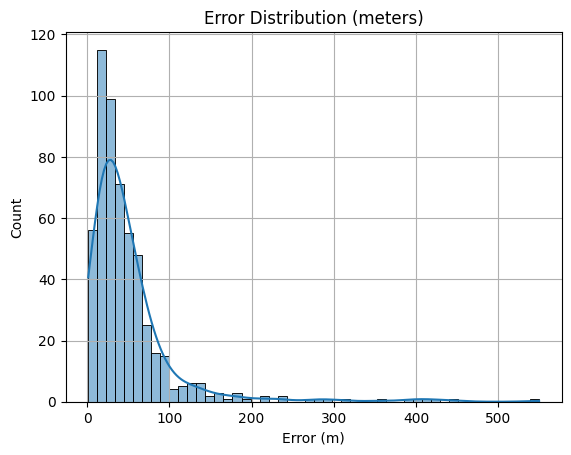

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_test_copy["error_m"], bins=50, kde=True)
plt.title("Error Distribution (meters)")
plt.xlabel("Error (m)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [ ]:
import torch
import torch.nn as nn

class SimpleMLP(nn.Module):
    def __init__(self, input_dim):
        super(SimpleMLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # Output: (lat, lon)
        )

    def forward(self, x):
        return self.net(x)


In [31]:
dl_agg2.isna().sum()

loc_key                             0
NR_UE_Throughput_PDCP_DL_mean    2730
NR_UE_Throughput_PDCP_DL_std     2730
NR_UE_Throughput_PDCP_DL_min     2730
NR_UE_Throughput_PDCP_DL_max     2730
                                 ... 
wcentroid_lon_pred                  5
vcentroid_lat_pred                  8
vcentroid_lon_pred                  8
Latitude                            0
Longitude                           0
Length: 112, dtype: int64

In [34]:
with open("columns2.txt", "w") as file:
    for i in dl_agg2.columns:
        file.write(i+"\n")

In [37]:
booster = model.get_booster()
gain_scores = booster.get_score(importance_type='gain')

importance_df = pd.DataFrame(list(gain_scores.items()), columns=["Feature", "Gain"])
importance_df = importance_df.sort_values("Gain", ascending=False)
importance_df.to_excel("feature_importance_full.xlsx", index=False)


In [35]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Use your trained model
plt.figure(figsize=(12, 8))
plot_importance(model, max_num_features=25, importance_type='gain')  # or 'weight', 'cover'
plt.title("Top 25 Feature Importances (by gain)")
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\3581612058.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

ValueError: Image size of 2956919x455 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

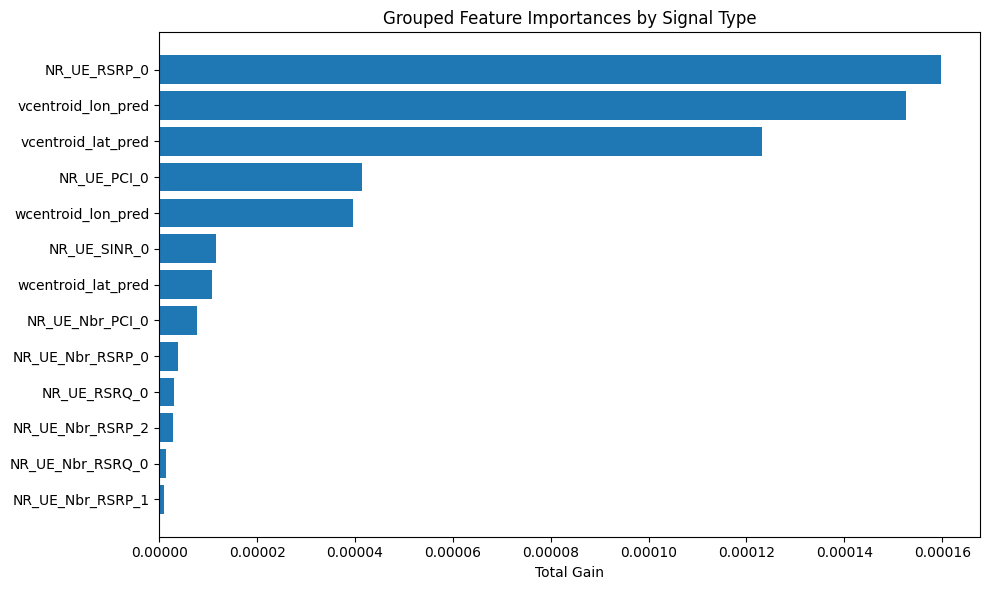

In [36]:
import re
from collections import defaultdict

booster = model.get_booster()
score_dict = booster.get_score(importance_type='gain')

# Group by base feature name
grouped_scores = defaultdict(float)
for feat, score in score_dict.items():
    base = re.sub(r'_(mean|std|min|max|count)$', '', feat)
    grouped_scores[base] += score

# Convert to DataFrame
grouped_df = pd.DataFrame({
    'feature': list(grouped_scores.keys()),
    'importance': list(grouped_scores.values())
}).sort_values("importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(grouped_df["feature"].iloc[::-1], grouped_df["importance"].iloc[::-1])
plt.title("Grouped Feature Importances by Signal Type")
plt.xlabel("Total Gain")
plt.tight_layout()
plt.show()


# Let's go . Alhamdulillah

In [38]:
# Get the exact loc_keys that survived cleaning
final_loc_keys = dl_agg2["loc_key"].unique().tolist()



In [119]:
# Filter UL and SC based on these loc_keys
ul_filtered = ul[ul["loc_key"].isin(final_loc_keys)].copy()
sc_filtered = sc[sc["loc_key"].isin(final_loc_keys)].copy()

print(f"✅ UL filtered rows: {len(ul_filtered)}")
print(f"✅ SC filtered rows: {len(sc_filtered)}")


✅ UL filtered rows: 171828
✅ SC filtered rows: 54528


In [39]:
ul1 = pd.read_excel(os.path.join(RAW_DATA_DIR, "v1_5G_UL.xlsx"), sheet_name="Series Formatted Data")
ul2 = pd.read_excel(os.path.join(RAW_DATA_DIR, "v2_5G_UL.xlsx"), sheet_name="Series Formatted Data")

ul = pd.concat([ul1, ul2], ignore_index=True)
ul = ul[["Latitude", "Longitude"] + UL_FEATURES].dropna(subset=["Latitude", "Longitude"])
ul["loc_key"] = ul["Latitude"].round(5).astype(str) + "_" + ul["Longitude"].round(5).astype(str)

ul.head()


,Latitude,Longitude,NR_UE_Throughput_RLC_UL,NR_UE_PCI_0,NR_UE_Power_Tx_PUSCH_0,App_Throughput_UL,NR_UE_NACK_Rate_UL_0,NR_UE_RSRP_0,NR_UE_Nbr_PCI_0,NR_UE_RSRQ_0,NR_UE_Nbr_RSRP_0,NR_UE_Nbr_RSRQ_0,NR_UE_Nbr_RSRP_1,NR_UE_SINR_0,NR_UE_Nbr_PCI_1,NR_UE_Nbr_RSRQ_1,NR_UE_Timing_Advance,loc_key
2,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
3,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
4,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
5,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
6,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949


In [40]:
sc1 = pd.read_excel(os.path.join(RAW_DATA_DIR, "v1_5G_Scanner.xlsx"), sheet_name="Series Formatted Data")
sc2 = pd.read_excel(os.path.join(RAW_DATA_DIR, "v2_5G_Scanner.xlsx"), sheet_name="Series Formatted Data")

sc = pd.concat([sc1, sc2], ignore_index=True)
sc = sc[["Latitude", "Longitude"] + SCAN_FEATURES].dropna(subset=["Latitude", "Longitude"])
sc["loc_key"] = sc["Latitude"].round(5).astype(str) + "_" + sc["Longitude"].round(5).astype(str)

sc.head()


,Latitude,Longitude,NR_Scan_PCI_SortedBy_RSRP_0,NR_Scan_PCI_SortedBy_RSRP_1,NR_Scan_SSB_RSRP_SortedBy_RSRP_0,NR_Scan_SSB_RSRP_SortedBy_RSRP_2,NR_Scan_SSB_RSRP_SortedBy_RSRP_1,NR_Scan_NR_ARFCN,NR_Scan_SSB_RSRQ_SortedBy_RSRP_0,NR_Scan_SSB_SINR_SortedBy_RSRP_0,NR_Scan_SSB_RSRQ_SortedBy_RSRP_2,NR_Scan_SSB_SINR_SortedBy_RSRP_2,NR_Scan_PCI_SortedBy_RSRP_2,NR_Scan_SSB_SINR_SortedBy_RSRP_1,NR_Scan_SSB_RSRQ_SortedBy_RSRP_1,loc_key
2,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
3,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
4,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
5,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
6,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949


## UL stuff

In [43]:
ul_filtered.columns

Index(['Latitude', 'Longitude', 'NR_UE_Throughput_RLC_UL', 'NR_UE_PCI_0',
       'NR_UE_Power_Tx_PUSCH_0', 'App_Throughput_UL', 'NR_UE_NACK_Rate_UL_0',
       'NR_UE_RSRP_0', 'NR_UE_Nbr_PCI_0', 'NR_UE_RSRQ_0', 'NR_UE_Nbr_RSRP_0',
       'NR_UE_Nbr_RSRQ_0', 'NR_UE_Nbr_RSRP_1', 'NR_UE_SINR_0',
       'NR_UE_Nbr_PCI_1', 'NR_UE_Nbr_RSRQ_1', 'NR_UE_Timing_Advance',
       'loc_key'],
      dtype='object')

In [120]:
ul_signal_cols = [
    "NR_UE_RSRP_0", "NR_UE_SINR_0", "NR_UE_RSRQ_0",
    "NR_UE_Throughput_RLC_UL", "App_Throughput_UL"
]


ul_filtered = ul_filtered.dropna(subset=ul_signal_cols, how="all")
print(f"✅ After dropping rows with all UL signal NaNs: {len(ul_filtered)}")


✅ After dropping rows with all UL signal NaNs: 12549


In [45]:
def is_useless_ul_signal(row):
    critical_cols = [
        "NR_UE_RSRP_0", "NR_UE_SINR_0", "NR_UE_RSRQ_0",
        "NR_UE_Nbr_RSRP_0", "NR_UE_Nbr_RSRP_1"
    ]
    if row[critical_cols].isna().all():
        return True
    if pd.notna(row["NR_UE_RSRP_0"]) and pd.notna(row["NR_UE_SINR_0"]):
        if (row["NR_UE_RSRP_0"] < -125) and (row["NR_UE_SINR_0"] < -5):
            return True
    return False

ul_filtered["bad_signal"] = ul_filtered.apply(is_useless_ul_signal, axis=1)
ul_filtered = ul_filtered[~ul_filtered["bad_signal"]].copy()
ul_filtered.drop(columns="bad_signal", inplace=True)

print(f"✅ After filtering weak UL signals: {len(ul_filtered)} rows")


✅ After filtering weak UL signals: 5267 rows


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\387714233.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ul_filtered["bad_signal"] = ul_filtered.apply(is_useless_ul_signal, axis=1)


In [46]:
ul_filtered = convert_pci(ul_filtered)


In [47]:
for pci_base in ["NR_UE_PCI_0", "NR_UE_Nbr_PCI_0", "NR_UE_Nbr_PCI_1"]:
    if f"{pci_base}_lat" in ul_filtered.columns:
        ul_filtered = apply_geometry_features(ul_filtered, pci_base)


In [48]:
ul_pci_rsrp_map = {
    "NR_UE_PCI_0": "NR_UE_RSRP_0",
    "NR_UE_Nbr_PCI_0": "NR_UE_Nbr_RSRP_0",
    "NR_UE_Nbr_PCI_1": "NR_UE_Nbr_RSRP_1",
}

ul_filtered["wcentroid_lat_pred"], ul_filtered["wcentroid_lon_pred"] = estimate_weighted_centroid(ul_filtered, ul_pci_rsrp_map)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:19: RuntimeWarning: invalid value encountered in divide
  lat_pred = np.where(weight_sum != 0, lat_sum / weight_sum, np.nan)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:20: RuntimeWarning: invalid value encountered in divide
  lon_pred = np.where(weight_sum != 0, lon_sum / weight_sum, np.nan)


In [49]:
# Aggregation functions
agg_funcs = ["mean", "std", "min", "max", "count"]

# Perform aggregation on signal features
ul_agg = ul_filtered.groupby("loc_key").agg({col: agg_funcs for col in UL_FEATURES})

# Flatten multi-level columns like "NR_UE_RSRP_0_mean"
ul_agg.columns = [f"{col}_{stat}" for col, stat in ul_agg.columns]
ul_agg = ul_agg.reset_index()

# Restore original coordinates from first observation per loc_key
lat_lon = ul_filtered.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()
ul_agg = pd.merge(ul_agg, lat_lon, on="loc_key", how="left")

# Also aggregate weighted centroid predictions (optional but helpful)
ul_pred_cols = ["wcentroid_lat_pred", "wcentroid_lon_pred"]
pred_agg = ul_filtered.groupby("loc_key")[ul_pred_cols].mean().reset_index()
ul_agg = pd.merge(ul_agg, pred_agg, on="loc_key", how="left")

print(f"✅ Final aggregated UL shape: {ul_agg.shape}")


✅ Final aggregated UL shape: (2472, 80)


In [ ]:
# Use previously split loc_keys
ul_train = ul_agg[ul_agg["loc_key"].isin(train_loc_keys)].reset_index(drop=True)
ul_test = ul_agg[ul_agg["loc_key"].isin(test_loc_keys)].reset_index(drop=True)

# Drop target + loc_key from features
X_train_ul = ul_train.drop(columns=["Latitude", "Longitude", "loc_key"])
X_test_ul = ul_test.drop(columns=["Latitude", "Longitude", "loc_key"])

# Targets
y_train_ul = ul_train[["Latitude", "Longitude"]]
y_test_ul = ul_test[["Latitude", "Longitude"]]

print(f"✅ Train size: {len(X_train_ul)} rows")
print(f"✅ Test size: {len(X_test_ul)} rows")


In [50]:
# Extract matching loc_keys from DL splits
train_loc_keys = dl_agg2.loc[X_train.index, "loc_key"].values.tolist()
test_loc_keys = dl_agg2.loc[X_test.index, "loc_key"].values.tolist()

# Apply to UL
ul_train = ul_agg[ul_agg["loc_key"].isin(train_loc_keys)].reset_index(drop=True)
ul_test = ul_agg[ul_agg["loc_key"].isin(test_loc_keys)].reset_index(drop=True)

# Prepare UL features and targets
X_train_ul = ul_train.drop(columns=["Latitude", "Longitude", "loc_key"])
X_test_ul = ul_test.drop(columns=["Latitude", "Longitude", "loc_key"])
y_train_ul = ul_train[["Latitude", "Longitude"]]
y_test_ul = ul_test[["Latitude", "Longitude"]]

print(f"✅ UL train size: {len(X_train_ul)}, UL test size: {len(X_test_ul)}")


✅ UL train size: 1979, UL test size: 493


In [51]:
from xgboost import XGBRegressor
import numpy as np

# Define and train the model
ul_model = XGBRegressor(
    subsample=1.0,
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    colsample_bytree=0.8,
    random_state=42
)

ul_model.fit(X_train_ul, y_train_ul)

# Predict
y_pred_ul = ul_model.predict(X_test_ul)

# Evaluate using Haversine error
def vectorized_haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # Earth radius in meters
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

haversine_errors_ul = vectorized_haversine(
    y_test_ul["Latitude"].values,
    y_test_ul["Longitude"].values,
    y_pred_ul[:, 0],
    y_pred_ul[:, 1]
)

# Print metrics
print(f"Haversine RMSE (meters): {np.sqrt(np.mean(haversine_errors_ul ** 2)):.2f}")
print(f"Mean Error: {np.mean(haversine_errors_ul):.2f} m")
print(f"Median Error: {np.median(haversine_errors_ul):.2f} m")
print(f"Max Error: {np.max(haversine_errors_ul):.2f} m")


Haversine RMSE (meters): 83.77
Mean Error: 54.25 m
Median Error: 38.59 m
Max Error: 763.48 m


In [52]:
# Filter Scanner data to match DL-cleaned keys
sc_filtered = sc[sc["loc_key"].isin(final_loc_keys)].copy()
print(f"✅ Scanner filtered rows: {len(sc_filtered)}")


✅ Scanner filtered rows: 54528


In [53]:
# Drop rows with all scanner signal values missing
sc_filtered = sc_filtered.dropna(subset=SCAN_FEATURES, how="all")
print(f"✅ After dropping scanner-NaN rows: {len(sc_filtered)}")


✅ After dropping scanner-NaN rows: 18128


In [54]:
agg_funcs = ["mean", "std", "min", "max", "count"]

sc_agg = sc_filtered.groupby("loc_key").agg({col: agg_funcs for col in SCAN_FEATURES})
sc_agg.columns = [f"{col}_{stat}" for col, stat in sc_agg.columns]
sc_agg = sc_agg.reset_index()

# Recover GT coordinates
latlon = sc_filtered.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()
sc_agg = pd.merge(sc_agg, latlon, on="loc_key", how="left")


In [56]:
sc_train = sc_agg[sc_agg["loc_key"].isin(train_loc_keys)].reset_index(drop=True)
sc_test = sc_agg[sc_agg["loc_key"].isin(test_loc_keys)].reset_index(drop=True)

print(f"✅ Scanner train size: {len(sc_train)}, test size: {len(sc_test)}")


✅ Scanner train size: 2177, test size: 545


In [57]:
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

# Define input and target
X_sc_train = sc_train.drop(columns=["Latitude", "Longitude", "loc_key"])
y_sc_train = sc_train[["Latitude", "Longitude"]]

X_sc_test = sc_test.drop(columns=["Latitude", "Longitude", "loc_key"])
y_sc_test = sc_test[["Latitude", "Longitude"]]

# Train model
model_sc = XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    colsample_bytree=0.8,
    subsample=1.0,
    random_state=42
)

model_sc.fit(X_sc_train, y_sc_train)

# Predict
y_pred_sc = model_sc.predict(X_sc_test)

# Vectorized Haversine
def vectorized_haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # in meters
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# Compute errors
haversine_errors_sc = vectorized_haversine(
    y_sc_test["Latitude"].values, y_sc_test["Longitude"].values,
    y_pred_sc[:, 0], y_pred_sc[:, 1]
)

# Print stats
print(f"Haversine RMSE (meters): {np.sqrt(np.mean(haversine_errors_sc ** 2)):.2f}")
print(f"Mean Error: {np.mean(haversine_errors_sc):.2f} m")
print(f"Median Error: {np.median(haversine_errors_sc):.2f} m")
print(f"Max Error: {np.max(haversine_errors_sc):.2f} m")


Haversine RMSE (meters): 64.02
Mean Error: 43.50 m
Median Error: 29.93 m
Max Error: 491.14 m


In [59]:
sc_pred_df = pd.DataFrame({
    "loc_key": sc_test["loc_key"].values,
    "sc_lat": y_pred_sc[:, 0],
    "sc_lon": y_pred_sc[:, 1]
})


In [65]:
# DL
# Correct loc_key usage
dl_pred_df = pd.DataFrame({
    "loc_key": loc_test.values,
    "dl_lat": y_pred[:, 0],
    "dl_lon": y_pred[:, 1]
})

# UL
ul_pred_df = pd.DataFrame({
    "loc_key": X_test_ul.index,  # or ul_test["loc_key"]
    "ul_lat": y_pred_ul[:, 0],
    "ul_lon": y_pred_ul[:, 1]
})


In [66]:
# Convert all loc_key columns to strings (safe fix)
dl_pred_df["loc_key"] = y_test["loc_key"].astype(str).values
ul_pred_df["loc_key"] = ul_test["loc_key"].astype(str).values
sc_pred_df["loc_key"] = sc_test["loc_key"].astype(str).values


KeyError: 'loc_key'

In [ ]:
# Define fixed inverse uncertainty weights (these can be tuned based on model RMSEs)
dl_w = 1 / (21.4 ** 2)
ul_w = 1 / (83.8 ** 2)
sc_w = 1 / (64.0 ** 2)

# Normalize weights
total_w = dl_w + ul_w + sc_w
dl_w, ul_w, sc_w = dl_w / total_w, ul_w / total_w, sc_w / total_w
print(f"Fusion Weights → DL: {dl_w:.2f}, UL: {ul_w:.2f}, SC: {sc_w:.2f}")

# Apply weighted fusion
fusion_df["fused_lat"] = (
    fusion_df["dl_lat"] * dl_w +
    fusion_df["ul_lat"] * ul_w +
    fusion_df["sc_lat"] * sc_w
)
fusion_df["fused_lon"] = (
    fusion_df["dl_lon"] * dl_w +
    fusion_df["ul_lon"] * ul_w +
    fusion_df["sc_lon"] * sc_w
)


In [ ]:
from haversine import haversine, Unit

def compute_error(row):
    return haversine(
        (row["Latitude"], row["Longitude"]),
        (row["fused_lat"], row["fused_lon"]),
        unit=Unit.METERS
    )

fusion_df["error_m"] = fusion_df.apply(compute_error, axis=1)

# Print evaluation metrics
print(f"Haversine RMSE (meters): {np.sqrt(np.mean(fusion_df['error_m'] ** 2)):.2f}")
print(f"Mean Error: {fusion_df['error_m'].mean():.2f} m")
print(f"Median Error: {fusion_df['error_m'].median():.2f} m")
print(f"Max Error: {fusion_df['error_m'].max():.2f} m")

# Show worst predictions (optional)
top_errors = fusion_df.sort_values("error_m", ascending=False).head(5)
for _, row in top_errors.iterrows():
    print(f"\n🔴 loc_key: {row['loc_key']}, Error: {row['error_m']:.2f} m")
    print(f"GT: ({row['Latitude']:.6f}, {row['Longitude']:.6f})")
    print(f"Pred: ({row['fused_lat']:.6f}, {row['fused_lon']:.6f})")


In [67]:
# From your cleaned and aggregated dl_agg2
loc_keys_dl = dl_agg2["loc_key"].astype(str)
X_dl = dl_agg2.drop(columns=["Latitude", "Longitude", "loc_key"])
y_dl = dl_agg2[["Latitude", "Longitude"]]

# Train-test split + loc_key
from sklearn.model_selection import train_test_split
X_train_dl, X_test_dl, y_train_dl, y_test_dl, loc_train_dl, loc_test_dl = train_test_split(
    X_dl, y_dl, loc_keys_dl, test_size=0.2, random_state=42
)


In [68]:
from xgboost import XGBRegressor
model_dl = XGBRegressor(n_estimators=300, max_depth=8, learning_rate=0.1,
                        colsample_bytree=0.8, subsample=1.0, random_state=42)
model_dl.fit(X_train_dl, y_train_dl)
y_pred_dl = model_dl.predict(X_test_dl)

# Build pred DataFrame
dl_pred_df = pd.DataFrame({
    "loc_key": loc_test_dl.values,
    "dl_lat": y_pred_dl[:, 0],
    "dl_lon": y_pred_dl[:, 1]
})


In [71]:
# ✅ Use the same aggregation as you did for training
ul_test_agg = ul_test_aligned.groupby("loc_key").agg(['mean', 'std', 'min', 'max', 'count'])

# Flatten multi-index columns
ul_test_agg.columns = ['_'.join(col).strip() for col in ul_test_agg.columns.values]
ul_test_agg = ul_test_agg.reset_index()

# Predict
y_pred_ul = ul_model.predict(ul_test_agg.drop(columns=["loc_key"]))

# Build prediction dataframe
ul_pred_df = pd.DataFrame({
    "loc_key": ul_test_agg["loc_key"].values,
    "ul_lat": y_pred_ul[:, 0],
    "ul_lon": y_pred_ul[:, 1]
})


ValueError: feature_names mismatch: ['NR_UE_Throughput_RLC_UL_mean', 'NR_UE_Throughput_RLC_UL_std', 'NR_UE_Throughput_RLC_UL_min', 'NR_UE_Throughput_RLC_UL_max', 'NR_UE_Throughput_RLC_UL_count', 'NR_UE_PCI_0_mean', 'NR_UE_PCI_0_std', 'NR_UE_PCI_0_min', 'NR_UE_PCI_0_max', 'NR_UE_PCI_0_count', 'NR_UE_Power_Tx_PUSCH_0_mean', 'NR_UE_Power_Tx_PUSCH_0_std', 'NR_UE_Power_Tx_PUSCH_0_min', 'NR_UE_Power_Tx_PUSCH_0_max', 'NR_UE_Power_Tx_PUSCH_0_count', 'App_Throughput_UL_mean', 'App_Throughput_UL_std', 'App_Throughput_UL_min', 'App_Throughput_UL_max', 'App_Throughput_UL_count', 'NR_UE_NACK_Rate_UL_0_mean', 'NR_UE_NACK_Rate_UL_0_std', 'NR_UE_NACK_Rate_UL_0_min', 'NR_UE_NACK_Rate_UL_0_max', 'NR_UE_NACK_Rate_UL_0_count', 'NR_UE_RSRP_0_mean', 'NR_UE_RSRP_0_std', 'NR_UE_RSRP_0_min', 'NR_UE_RSRP_0_max', 'NR_UE_RSRP_0_count', 'NR_UE_Nbr_PCI_0_mean', 'NR_UE_Nbr_PCI_0_std', 'NR_UE_Nbr_PCI_0_min', 'NR_UE_Nbr_PCI_0_max', 'NR_UE_Nbr_PCI_0_count', 'NR_UE_RSRQ_0_mean', 'NR_UE_RSRQ_0_std', 'NR_UE_RSRQ_0_min', 'NR_UE_RSRQ_0_max', 'NR_UE_RSRQ_0_count', 'NR_UE_Nbr_RSRP_0_mean', 'NR_UE_Nbr_RSRP_0_std', 'NR_UE_Nbr_RSRP_0_min', 'NR_UE_Nbr_RSRP_0_max', 'NR_UE_Nbr_RSRP_0_count', 'NR_UE_Nbr_RSRQ_0_mean', 'NR_UE_Nbr_RSRQ_0_std', 'NR_UE_Nbr_RSRQ_0_min', 'NR_UE_Nbr_RSRQ_0_max', 'NR_UE_Nbr_RSRQ_0_count', 'NR_UE_Nbr_RSRP_1_mean', 'NR_UE_Nbr_RSRP_1_std', 'NR_UE_Nbr_RSRP_1_min', 'NR_UE_Nbr_RSRP_1_max', 'NR_UE_Nbr_RSRP_1_count', 'NR_UE_SINR_0_mean', 'NR_UE_SINR_0_std', 'NR_UE_SINR_0_min', 'NR_UE_SINR_0_max', 'NR_UE_SINR_0_count', 'NR_UE_Nbr_PCI_1_mean', 'NR_UE_Nbr_PCI_1_std', 'NR_UE_Nbr_PCI_1_min', 'NR_UE_Nbr_PCI_1_max', 'NR_UE_Nbr_PCI_1_count', 'NR_UE_Nbr_RSRQ_1_mean', 'NR_UE_Nbr_RSRQ_1_std', 'NR_UE_Nbr_RSRQ_1_min', 'NR_UE_Nbr_RSRQ_1_max', 'NR_UE_Nbr_RSRQ_1_count', 'NR_UE_Timing_Advance_mean', 'NR_UE_Timing_Advance_std', 'NR_UE_Timing_Advance_min', 'NR_UE_Timing_Advance_max', 'NR_UE_Timing_Advance_count', 'wcentroid_lat_pred', 'wcentroid_lon_pred'] ['Latitude_mean', 'Latitude_std', 'Latitude_min', 'Latitude_max', 'Latitude_count', 'Longitude_mean', 'Longitude_std', 'Longitude_min', 'Longitude_max', 'Longitude_count', 'NR_UE_Throughput_RLC_UL_mean', 'NR_UE_Throughput_RLC_UL_std', 'NR_UE_Throughput_RLC_UL_min', 'NR_UE_Throughput_RLC_UL_max', 'NR_UE_Throughput_RLC_UL_count', 'NR_UE_PCI_0_mean', 'NR_UE_PCI_0_std', 'NR_UE_PCI_0_min', 'NR_UE_PCI_0_max', 'NR_UE_PCI_0_count', 'NR_UE_Power_Tx_PUSCH_0_mean', 'NR_UE_Power_Tx_PUSCH_0_std', 'NR_UE_Power_Tx_PUSCH_0_min', 'NR_UE_Power_Tx_PUSCH_0_max', 'NR_UE_Power_Tx_PUSCH_0_count', 'App_Throughput_UL_mean', 'App_Throughput_UL_std', 'App_Throughput_UL_min', 'App_Throughput_UL_max', 'App_Throughput_UL_count', 'NR_UE_NACK_Rate_UL_0_mean', 'NR_UE_NACK_Rate_UL_0_std', 'NR_UE_NACK_Rate_UL_0_min', 'NR_UE_NACK_Rate_UL_0_max', 'NR_UE_NACK_Rate_UL_0_count', 'NR_UE_RSRP_0_mean', 'NR_UE_RSRP_0_std', 'NR_UE_RSRP_0_min', 'NR_UE_RSRP_0_max', 'NR_UE_RSRP_0_count', 'NR_UE_Nbr_PCI_0_mean', 'NR_UE_Nbr_PCI_0_std', 'NR_UE_Nbr_PCI_0_min', 'NR_UE_Nbr_PCI_0_max', 'NR_UE_Nbr_PCI_0_count', 'NR_UE_RSRQ_0_mean', 'NR_UE_RSRQ_0_std', 'NR_UE_RSRQ_0_min', 'NR_UE_RSRQ_0_max', 'NR_UE_RSRQ_0_count', 'NR_UE_Nbr_RSRP_0_mean', 'NR_UE_Nbr_RSRP_0_std', 'NR_UE_Nbr_RSRP_0_min', 'NR_UE_Nbr_RSRP_0_max', 'NR_UE_Nbr_RSRP_0_count', 'NR_UE_Nbr_RSRQ_0_mean', 'NR_UE_Nbr_RSRQ_0_std', 'NR_UE_Nbr_RSRQ_0_min', 'NR_UE_Nbr_RSRQ_0_max', 'NR_UE_Nbr_RSRQ_0_count', 'NR_UE_Nbr_RSRP_1_mean', 'NR_UE_Nbr_RSRP_1_std', 'NR_UE_Nbr_RSRP_1_min', 'NR_UE_Nbr_RSRP_1_max', 'NR_UE_Nbr_RSRP_1_count', 'NR_UE_SINR_0_mean', 'NR_UE_SINR_0_std', 'NR_UE_SINR_0_min', 'NR_UE_SINR_0_max', 'NR_UE_SINR_0_count', 'NR_UE_Nbr_PCI_1_mean', 'NR_UE_Nbr_PCI_1_std', 'NR_UE_Nbr_PCI_1_min', 'NR_UE_Nbr_PCI_1_max', 'NR_UE_Nbr_PCI_1_count', 'NR_UE_Nbr_RSRQ_1_mean', 'NR_UE_Nbr_RSRQ_1_std', 'NR_UE_Nbr_RSRQ_1_min', 'NR_UE_Nbr_RSRQ_1_max', 'NR_UE_Nbr_RSRQ_1_count', 'NR_UE_Timing_Advance_mean', 'NR_UE_Timing_Advance_std', 'NR_UE_Timing_Advance_min', 'NR_UE_Timing_Advance_max', 'NR_UE_Timing_Advance_count', 'NR_UE_PCI_0_lat_mean', 'NR_UE_PCI_0_lat_std', 'NR_UE_PCI_0_lat_min', 'NR_UE_PCI_0_lat_max', 'NR_UE_PCI_0_lat_count', 'NR_UE_PCI_0_lon_mean', 'NR_UE_PCI_0_lon_std', 'NR_UE_PCI_0_lon_min', 'NR_UE_PCI_0_lon_max', 'NR_UE_PCI_0_lon_count', 'NR_UE_PCI_0_azimuth_mean', 'NR_UE_PCI_0_azimuth_std', 'NR_UE_PCI_0_azimuth_min', 'NR_UE_PCI_0_azimuth_max', 'NR_UE_PCI_0_azimuth_count', 'NR_UE_PCI_0_height_mean', 'NR_UE_PCI_0_height_std', 'NR_UE_PCI_0_height_min', 'NR_UE_PCI_0_height_max', 'NR_UE_PCI_0_height_count', 'NR_UE_PCI_0_bs_found_mean', 'NR_UE_PCI_0_bs_found_std', 'NR_UE_PCI_0_bs_found_min', 'NR_UE_PCI_0_bs_found_max', 'NR_UE_PCI_0_bs_found_count', 'NR_UE_Nbr_PCI_0_lat_mean', 'NR_UE_Nbr_PCI_0_lat_std', 'NR_UE_Nbr_PCI_0_lat_min', 'NR_UE_Nbr_PCI_0_lat_max', 'NR_UE_Nbr_PCI_0_lat_count', 'NR_UE_Nbr_PCI_0_lon_mean', 'NR_UE_Nbr_PCI_0_lon_std', 'NR_UE_Nbr_PCI_0_lon_min', 'NR_UE_Nbr_PCI_0_lon_max', 'NR_UE_Nbr_PCI_0_lon_count', 'NR_UE_Nbr_PCI_0_azimuth_mean', 'NR_UE_Nbr_PCI_0_azimuth_std', 'NR_UE_Nbr_PCI_0_azimuth_min', 'NR_UE_Nbr_PCI_0_azimuth_max', 'NR_UE_Nbr_PCI_0_azimuth_count', 'NR_UE_Nbr_PCI_0_height_mean', 'NR_UE_Nbr_PCI_0_height_std', 'NR_UE_Nbr_PCI_0_height_min', 'NR_UE_Nbr_PCI_0_height_max', 'NR_UE_Nbr_PCI_0_height_count', 'NR_UE_Nbr_PCI_0_bs_found_mean', 'NR_UE_Nbr_PCI_0_bs_found_std', 'NR_UE_Nbr_PCI_0_bs_found_min', 'NR_UE_Nbr_PCI_0_bs_found_max', 'NR_UE_Nbr_PCI_0_bs_found_count', 'NR_UE_Nbr_PCI_1_lat_mean', 'NR_UE_Nbr_PCI_1_lat_std', 'NR_UE_Nbr_PCI_1_lat_min', 'NR_UE_Nbr_PCI_1_lat_max', 'NR_UE_Nbr_PCI_1_lat_count', 'NR_UE_Nbr_PCI_1_lon_mean', 'NR_UE_Nbr_PCI_1_lon_std', 'NR_UE_Nbr_PCI_1_lon_min', 'NR_UE_Nbr_PCI_1_lon_max', 'NR_UE_Nbr_PCI_1_lon_count', 'NR_UE_Nbr_PCI_1_azimuth_mean', 'NR_UE_Nbr_PCI_1_azimuth_std', 'NR_UE_Nbr_PCI_1_azimuth_min', 'NR_UE_Nbr_PCI_1_azimuth_max', 'NR_UE_Nbr_PCI_1_azimuth_count', 'NR_UE_Nbr_PCI_1_height_mean', 'NR_UE_Nbr_PCI_1_height_std', 'NR_UE_Nbr_PCI_1_height_min', 'NR_UE_Nbr_PCI_1_height_max', 'NR_UE_Nbr_PCI_1_height_count', 'NR_UE_Nbr_PCI_1_bs_found_mean', 'NR_UE_Nbr_PCI_1_bs_found_std', 'NR_UE_Nbr_PCI_1_bs_found_min', 'NR_UE_Nbr_PCI_1_bs_found_max', 'NR_UE_Nbr_PCI_1_bs_found_count', 'NR_UE_PCI_0_distance_mean', 'NR_UE_PCI_0_distance_std', 'NR_UE_PCI_0_distance_min', 'NR_UE_PCI_0_distance_max', 'NR_UE_PCI_0_distance_count', 'NR_UE_PCI_0_bearing_mean', 'NR_UE_PCI_0_bearing_std', 'NR_UE_PCI_0_bearing_min', 'NR_UE_PCI_0_bearing_max', 'NR_UE_PCI_0_bearing_count', 'NR_UE_PCI_0_angle_offset_mean', 'NR_UE_PCI_0_angle_offset_std', 'NR_UE_PCI_0_angle_offset_min', 'NR_UE_PCI_0_angle_offset_max', 'NR_UE_PCI_0_angle_offset_count', 'NR_UE_PCI_0_cos_offset_mean', 'NR_UE_PCI_0_cos_offset_std', 'NR_UE_PCI_0_cos_offset_min', 'NR_UE_PCI_0_cos_offset_max', 'NR_UE_PCI_0_cos_offset_count', 'NR_UE_PCI_0_rsrp_weighted_mean', 'NR_UE_PCI_0_rsrp_weighted_std', 'NR_UE_PCI_0_rsrp_weighted_min', 'NR_UE_PCI_0_rsrp_weighted_max', 'NR_UE_PCI_0_rsrp_weighted_count', 'NR_UE_Nbr_PCI_0_distance_mean', 'NR_UE_Nbr_PCI_0_distance_std', 'NR_UE_Nbr_PCI_0_distance_min', 'NR_UE_Nbr_PCI_0_distance_max', 'NR_UE_Nbr_PCI_0_distance_count', 'NR_UE_Nbr_PCI_0_bearing_mean', 'NR_UE_Nbr_PCI_0_bearing_std', 'NR_UE_Nbr_PCI_0_bearing_min', 'NR_UE_Nbr_PCI_0_bearing_max', 'NR_UE_Nbr_PCI_0_bearing_count', 'NR_UE_Nbr_PCI_0_angle_offset_mean', 'NR_UE_Nbr_PCI_0_angle_offset_std', 'NR_UE_Nbr_PCI_0_angle_offset_min', 'NR_UE_Nbr_PCI_0_angle_offset_max', 'NR_UE_Nbr_PCI_0_angle_offset_count', 'NR_UE_Nbr_PCI_0_cos_offset_mean', 'NR_UE_Nbr_PCI_0_cos_offset_std', 'NR_UE_Nbr_PCI_0_cos_offset_min', 'NR_UE_Nbr_PCI_0_cos_offset_max', 'NR_UE_Nbr_PCI_0_cos_offset_count', 'NR_UE_Nbr_PCI_0_rsrp_weighted_mean', 'NR_UE_Nbr_PCI_0_rsrp_weighted_std', 'NR_UE_Nbr_PCI_0_rsrp_weighted_min', 'NR_UE_Nbr_PCI_0_rsrp_weighted_max', 'NR_UE_Nbr_PCI_0_rsrp_weighted_count', 'NR_UE_Nbr_PCI_1_distance_mean', 'NR_UE_Nbr_PCI_1_distance_std', 'NR_UE_Nbr_PCI_1_distance_min', 'NR_UE_Nbr_PCI_1_distance_max', 'NR_UE_Nbr_PCI_1_distance_count', 'NR_UE_Nbr_PCI_1_bearing_mean', 'NR_UE_Nbr_PCI_1_bearing_std', 'NR_UE_Nbr_PCI_1_bearing_min', 'NR_UE_Nbr_PCI_1_bearing_max', 'NR_UE_Nbr_PCI_1_bearing_count', 'NR_UE_Nbr_PCI_1_angle_offset_mean', 'NR_UE_Nbr_PCI_1_angle_offset_std', 'NR_UE_Nbr_PCI_1_angle_offset_min', 'NR_UE_Nbr_PCI_1_angle_offset_max', 'NR_UE_Nbr_PCI_1_angle_offset_count', 'NR_UE_Nbr_PCI_1_cos_offset_mean', 'NR_UE_Nbr_PCI_1_cos_offset_std', 'NR_UE_Nbr_PCI_1_cos_offset_min', 'NR_UE_Nbr_PCI_1_cos_offset_max', 'NR_UE_Nbr_PCI_1_cos_offset_count', 'NR_UE_Nbr_PCI_1_rsrp_weighted_mean', 'NR_UE_Nbr_PCI_1_rsrp_weighted_std', 'NR_UE_Nbr_PCI_1_rsrp_weighted_min', 'NR_UE_Nbr_PCI_1_rsrp_weighted_max', 'NR_UE_Nbr_PCI_1_rsrp_weighted_count', 'wcentroid_lat_pred_mean', 'wcentroid_lat_pred_std', 'wcentroid_lat_pred_min', 'wcentroid_lat_pred_max', 'wcentroid_lat_pred_count', 'wcentroid_lon_pred_mean', 'wcentroid_lon_pred_std', 'wcentroid_lon_pred_min', 'wcentroid_lon_pred_max', 'wcentroid_lon_pred_count']
expected wcentroid_lat_pred, wcentroid_lon_pred in input data
training data did not have the following fields: NR_UE_Nbr_PCI_1_bs_found_min, NR_UE_Nbr_PCI_0_rsrp_weighted_min, NR_UE_PCI_0_height_mean, NR_UE_PCI_0_bs_found_count, NR_UE_Nbr_PCI_1_rsrp_weighted_max, NR_UE_Nbr_PCI_0_lon_min, NR_UE_PCI_0_rsrp_weighted_std, NR_UE_PCI_0_bs_found_std, wcentroid_lat_pred_min, NR_UE_PCI_0_distance_max, NR_UE_PCI_0_angle_offset_std, NR_UE_PCI_0_height_min, NR_UE_Nbr_PCI_1_height_mean, NR_UE_Nbr_PCI_0_cos_offset_mean, NR_UE_Nbr_PCI_0_rsrp_weighted_max, NR_UE_Nbr_PCI_0_azimuth_min, NR_UE_PCI_0_bearing_min, NR_UE_Nbr_PCI_0_angle_offset_mean, NR_UE_PCI_0_bs_found_max, NR_UE_Nbr_PCI_0_lon_mean, NR_UE_Nbr_PCI_1_height_count, NR_UE_Nbr_PCI_1_angle_offset_std, NR_UE_Nbr_PCI_0_bearing_count, NR_UE_Nbr_PCI_0_lat_count, NR_UE_PCI_0_lat_max, NR_UE_Nbr_PCI_1_lon_min, NR_UE_Nbr_PCI_0_distance_count, NR_UE_Nbr_PCI_1_lat_max, NR_UE_PCI_0_azimuth_mean, NR_UE_Nbr_PCI_0_lon_count, NR_UE_Nbr_PCI_0_cos_offset_min, wcentroid_lon_pred_min, NR_UE_Nbr_PCI_0_distance_max, NR_UE_PCI_0_rsrp_weighted_max, NR_UE_Nbr_PCI_1_lat_mean, NR_UE_PCI_0_bearing_mean, NR_UE_Nbr_PCI_0_distance_mean, NR_UE_Nbr_PCI_1_azimuth_max, NR_UE_PCI_0_height_max, NR_UE_Nbr_PCI_0_lon_max, NR_UE_Nbr_PCI_0_rsrp_weighted_count, NR_UE_Nbr_PCI_0_bs_found_max, Latitude_count, NR_UE_Nbr_PCI_1_lon_count, NR_UE_Nbr_PCI_1_lon_std, NR_UE_PCI_0_distance_min, NR_UE_Nbr_PCI_1_bs_found_max, NR_UE_Nbr_PCI_0_angle_offset_max, NR_UE_PCI_0_distance_count, wcentroid_lon_pred_mean, NR_UE_PCI_0_lon_mean, NR_UE_Nbr_PCI_0_lat_mean, NR_UE_Nbr_PCI_1_height_std, NR_UE_Nbr_PCI_1_cos_offset_min, NR_UE_Nbr_PCI_1_lon_mean, NR_UE_Nbr_PCI_0_angle_offset_count, NR_UE_Nbr_PCI_1_distance_mean, NR_UE_Nbr_PCI_0_lat_min, NR_UE_PCI_0_lon_max, Longitude_mean, NR_UE_Nbr_PCI_0_cos_offset_max, NR_UE_PCI_0_cos_offset_mean, NR_UE_Nbr_PCI_1_height_max, NR_UE_PCI_0_cos_offset_std, NR_UE_PCI_0_distance_mean, NR_UE_Nbr_PCI_0_height_std, NR_UE_PCI_0_cos_offset_count, NR_UE_Nbr_PCI_1_bearing_std, NR_UE_Nbr_PCI_1_lat_count, NR_UE_Nbr_PCI_0_bearing_std, NR_UE_PCI_0_height_count, NR_UE_Nbr_PCI_0_distance_min, NR_UE_Nbr_PCI_1_angle_offset_count, Longitude_min, NR_UE_Nbr_PCI_1_rsrp_weighted_count, NR_UE_PCI_0_bearing_count, NR_UE_PCI_0_lat_mean, NR_UE_Nbr_PCI_1_height_min, Longitude_count, NR_UE_Nbr_PCI_0_lon_std, NR_UE_Nbr_PCI_1_distance_max, NR_UE_Nbr_PCI_0_cos_offset_std, Latitude_min, NR_UE_Nbr_PCI_0_height_count, NR_UE_Nbr_PCI_1_azimuth_count, NR_UE_PCI_0_bs_found_mean, NR_UE_Nbr_PCI_0_bearing_max, NR_UE_Nbr_PCI_1_lat_std, NR_UE_PCI_0_lon_count, NR_UE_PCI_0_distance_std, NR_UE_PCI_0_bs_found_min, NR_UE_PCI_0_angle_offset_min, NR_UE_Nbr_PCI_0_azimuth_std, NR_UE_PCI_0_lat_count, NR_UE_Nbr_PCI_0_bs_found_mean, NR_UE_Nbr_PCI_1_rsrp_weighted_mean, NR_UE_Nbr_PCI_1_angle_offset_min, NR_UE_Nbr_PCI_1_cos_offset_mean, wcentroid_lon_pred_std, NR_UE_Nbr_PCI_0_bs_found_std, NR_UE_Nbr_PCI_1_lon_max, NR_UE_PCI_0_lon_std, NR_UE_Nbr_PCI_1_azimuth_mean, NR_UE_Nbr_PCI_1_azimuth_std, NR_UE_PCI_0_bearing_std, NR_UE_Nbr_PCI_1_bearing_max, NR_UE_Nbr_PCI_1_lat_min, NR_UE_Nbr_PCI_0_lat_std, NR_UE_Nbr_PCI_1_distance_std, NR_UE_Nbr_PCI_0_bs_found_min, NR_UE_PCI_0_bearing_max, NR_UE_Nbr_PCI_0_azimuth_mean, wcentroid_lon_pred_max, NR_UE_PCI_0_azimuth_min, NR_UE_Nbr_PCI_0_azimuth_max, NR_UE_Nbr_PCI_1_rsrp_weighted_min, NR_UE_PCI_0_azimuth_count, Latitude_mean, NR_UE_Nbr_PCI_1_bs_found_mean, NR_UE_PCI_0_cos_offset_min, NR_UE_Nbr_PCI_1_bearing_count, NR_UE_PCI_0_cos_offset_max, Latitude_std, NR_UE_Nbr_PCI_0_rsrp_weighted_std, NR_UE_Nbr_PCI_1_bearing_mean, NR_UE_PCI_0_lat_min, wcentroid_lat_pred_std, Longitude_max, NR_UE_Nbr_PCI_0_rsrp_weighted_mean, NR_UE_Nbr_PCI_0_height_min, wcentroid_lat_pred_max, wcentroid_lat_pred_mean, NR_UE_Nbr_PCI_0_bearing_mean, NR_UE_PCI_0_angle_offset_count, NR_UE_Nbr_PCI_1_cos_offset_max, Latitude_max, NR_UE_PCI_0_azimuth_max, NR_UE_PCI_0_height_std, NR_UE_Nbr_PCI_0_height_mean, NR_UE_Nbr_PCI_1_cos_offset_std, NR_UE_Nbr_PCI_0_height_max, NR_UE_Nbr_PCI_0_cos_offset_count, NR_UE_Nbr_PCI_1_angle_offset_mean, NR_UE_Nbr_PCI_0_lat_max, NR_UE_Nbr_PCI_1_distance_count, NR_UE_Nbr_PCI_1_bearing_min, NR_UE_Nbr_PCI_1_distance_min, NR_UE_Nbr_PCI_0_bs_found_count, NR_UE_PCI_0_rsrp_weighted_mean, NR_UE_PCI_0_rsrp_weighted_count, NR_UE_Nbr_PCI_1_angle_offset_max, wcentroid_lat_pred_count, NR_UE_PCI_0_rsrp_weighted_min, NR_UE_PCI_0_lon_min, NR_UE_Nbr_PCI_1_rsrp_weighted_std, NR_UE_Nbr_PCI_0_angle_offset_std, NR_UE_Nbr_PCI_1_bs_found_std, Longitude_std, NR_UE_PCI_0_angle_offset_max, NR_UE_Nbr_PCI_0_distance_std, NR_UE_Nbr_PCI_0_angle_offset_min, NR_UE_Nbr_PCI_1_azimuth_min, NR_UE_Nbr_PCI_1_cos_offset_count, NR_UE_Nbr_PCI_0_bearing_min, NR_UE_Nbr_PCI_0_azimuth_count, wcentroid_lon_pred_count, NR_UE_PCI_0_lat_std, NR_UE_Nbr_PCI_1_bs_found_count, NR_UE_PCI_0_angle_offset_mean, NR_UE_PCI_0_azimuth_std

In [70]:
# Merge predictions
fused_df = dl_pred_df.merge(ul_pred_df, on="loc_key").merge(sc_pred_df, on="loc_key")

# Add GT
gt_df = dl_agg2[["loc_key", "Latitude", "Longitude"]].copy()
fused_df = fused_df.merge(gt_df, on="loc_key")

# Naive average fusion
fused_df["lat_fused"] = fused_df[["dl_lat", "ul_lat", "sc_lat"]].mean(axis=1)
fused_df["lon_fused"] = fused_df[["dl_lon", "ul_lon", "sc_lon"]].mean(axis=1)

# Haversine eval
def vectorized_haversine(lat1, lon1, lat2, lon2):
    R = 6371000
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

fused_df["error_m"] = vectorized_haversine(
    fused_df["Latitude"], fused_df["Longitude"],
    fused_df["lat_fused"], fused_df["lon_fused"]
)

# Print final results
print(f"\n✅ Late Fusion Results:")
print(f"Haversine RMSE: {np.sqrt(np.mean(fused_df['error_m'] ** 2)):.2f} m")
print(f"Mean Error: {np.mean(fused_df['error_m']):.2f} m")
print(f"Median Error: {np.median(fused_df['error_m']):.2f} m")
print(f"Max Error: {np.max(fused_df['error_m']):.2f} m")


ValueError: You are trying to merge on object and int64 columns for key 'loc_key'. If you wish to proceed you should use pd.concat

## Scanner

In [142]:
# Filter by valid loc_keys from DL
sc_filtered = sc[sc["loc_key"].isin(final_loc_keys)].copy()
print(f"✅ Initial Scanner rows after loc_key filter: {len(sc_filtered)}")

# Drop rows with all essential signal values missing
scan_signal_cols = [
    'NR_Scan_SSB_RSRP_SortedBy_RSRP_0',
    'NR_Scan_SSB_SINR_SortedBy_RSRP_0',
    'NR_Scan_SSB_RSRQ_SortedBy_RSRP_0'
]
sc_filtered = sc_filtered.dropna(subset=scan_signal_cols, how='all')
print(f"✅ Scanner rows after signal NaN removal: {len(sc_filtered)}")

# Clean PCI columns (make sure they're numeric Int64)
for pci_col in [col for col in SCAN_FEATURES if "PCI" in col]:
    sc_filtered[pci_col] = pd.to_numeric(sc_filtered[pci_col], errors='coerce').astype("Int64")


✅ Initial Scanner rows after loc_key filter: 54528
✅ Scanner rows after signal NaN removal: 16026


In [143]:
# Custom signal dominance features
sc_filtered["RSRP_range"] = (
    sc_filtered["NR_Scan_SSB_RSRP_SortedBy_RSRP_0"] -
    sc_filtered["NR_Scan_SSB_RSRP_SortedBy_RSRP_2"]
)

sc_filtered["SINR_range"] = (
    sc_filtered["NR_Scan_SSB_SINR_SortedBy_RSRP_0"] -
    sc_filtered["NR_Scan_SSB_SINR_SortedBy_RSRP_2"]
)

sc_filtered["RSRP_ratio"] = (
    sc_filtered["NR_Scan_SSB_RSRP_SortedBy_RSRP_0"] /
    (sc_filtered["NR_Scan_SSB_RSRP_SortedBy_RSRP_1"] + 1e-6)
)

# Missing indicator
sc_filtered["missing_any_signal"] = sc_filtered[
    ["NR_Scan_SSB_RSRP_SortedBy_RSRP_0", "NR_Scan_SSB_SINR_SortedBy_RSRP_0"]
].isna().any(axis=1).astype(int)


In [144]:
# Add base station lat/lon/azimuth info (this handles all PCI cols)
sc_filtered = convert_pci(sc_filtered)

# Apply geometry features
scanner_pci_cols = [
    'NR_Scan_PCI_SortedBy_RSRP_0',
    'NR_Scan_PCI_SortedBy_RSRP_1',
    'NR_Scan_PCI_SortedBy_RSRP_2'
]
for pci_col in scanner_pci_cols:
    if f"{pci_col}_lat" in sc_filtered.columns:
        sc_filtered = apply_geometry_features(sc_filtered, pci_col)

print(f"✅ Geometry features added to scanner data.")


✅ Geometry features added to scanner data.


In [145]:
scanner_pci_rsrp_map = {
    "NR_Scan_PCI_SortedBy_RSRP_0": "NR_Scan_SSB_RSRP_SortedBy_RSRP_0",
    "NR_Scan_PCI_SortedBy_RSRP_1": "NR_Scan_SSB_RSRP_SortedBy_RSRP_1",
    "NR_Scan_PCI_SortedBy_RSRP_2": "NR_Scan_SSB_RSRP_SortedBy_RSRP_2"
}

sc_filtered["wcentroid_lat_pred"], sc_filtered["wcentroid_lon_pred"] = estimate_weighted_centroid(
    sc_filtered, scanner_pci_rsrp_map
)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:19: RuntimeWarning: invalid value encountered in divide
  lat_pred = np.where(weight_sum != 0, lat_sum / weight_sum, np.nan)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:20: RuntimeWarning: invalid value encountered in divide
  lon_pred = np.where(weight_sum != 0, lon_sum / weight_sum, np.nan)


In [146]:
# Include custom features
custom_features = ["RSRP_range", "SINR_range", "RSRP_ratio", "missing_any_signal"]
agg_features = SCAN_FEATURES + custom_features

agg_funcs = ["mean", "std", "min", "max", "count"]

sc_agg = sc_filtered.groupby("loc_key").agg({col: agg_funcs for col in agg_features})
sc_agg.columns = [f"{col}_{stat}" for col, stat in sc_agg.columns]
sc_agg = sc_agg.reset_index()


In [147]:
latlon = sc_filtered.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()
preds = sc_filtered.groupby("loc_key")[["wcentroid_lat_pred", "wcentroid_lon_pred"]].mean().reset_index()

sc_agg = sc_agg.merge(latlon, on="loc_key", how="left")
sc_agg = sc_agg.merge(preds, on="loc_key", how="left")

print(f"✅ Final aggregated scanner shape: {sc_agg.shape}")


✅ Final aggregated scanner shape: (2689, 90)


In [148]:
sc_agg2 = sc_agg.copy()

# Use same loc_key sets from DL
sc_train = sc_agg2[sc_agg2["loc_key"].isin(train_loc_keys)].copy()
sc_test = sc_agg2[sc_agg2["loc_key"].isin(test_loc_keys)].copy()

print(f"✅ Scanner train: {len(sc_train)}, test: {len(sc_test)}")


✅ Scanner train: 2151, test: 538


In [149]:
# Define input features (drop loc_key, Latitude, Longitude)
exclude_cols = ["loc_key", "Latitude", "Longitude"]
X_train_sc = sc_train.drop(columns=exclude_cols)
y_train_sc = sc_train[["Latitude", "Longitude"]]

X_test_sc = sc_test.drop(columns=exclude_cols)
y_test_sc = sc_test[["Latitude", "Longitude"]]


In [150]:
from xgboost import XGBRegressor

sc_model2 = XGBRegressor(n_estimators=300, max_depth=8, learning_rate=0.1,
                        colsample_bytree=0.8, subsample=1.0, random_state=42)

sc_model2.fit(X_train_sc, y_train_sc)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [151]:
from haversine import haversine
import numpy as np

y_pred_sc = sc_model2.predict(X_test_sc)
sc_test_eval = sc_test[["loc_key", "Latitude", "Longitude"]].copy()
sc_test_eval["pred_lat"] = y_pred_sc[:, 0]
sc_test_eval["pred_lon"] = y_pred_sc[:, 1]

# Haversine error
sc_test_eval["error_m"] = sc_test_eval.apply(
    lambda row: haversine((row["Latitude"], row["Longitude"]),
                          (row["pred_lat"], row["pred_lon"])) * 1000,
    axis=1
)

print("📡 Scanner Model (Enhanced) Evaluation:")
print(f"RMSE: {np.sqrt(np.mean(sc_test_eval['error_m'] ** 2)):.2f} m")
print(f"Mean Error: {sc_test_eval['error_m'].mean():.2f} m")
print(f"Median Error: {sc_test_eval['error_m'].median():.2f} m")
print(f"Max Error: {sc_test_eval['error_m'].max():.2f} m")


📡 Scanner Model (Enhanced) Evaluation:
RMSE: 68.44 m
Mean Error: 42.79 m
Median Error: 32.00 m
Max Error: 564.35 m


In [152]:
# Show top 10 worst predictions
worst_scanner_preds = sc_test_eval.sort_values(by="error_m", ascending=False).head(10)
print("\n🔍 Top 10 Worst Scanner Predictions:")
print(worst_scanner_preds)


🔍 Top 10 Worst Scanner Predictions:
                loc_key  Latitude  Longitude   pred_lat   pred_lon     error_m
0      41.09902_29.0261  41.09902   29.02610  41.102737  29.030685  564.349688
28    41.09942_29.02293  41.09942   29.02293  41.103371  29.018955  551.272542
161   41.10236_29.02443  41.10236   29.02443  41.105911  29.026560  433.332648
2482  41.10771_29.01979  41.10771   29.01979  41.104156  29.020241  396.933343
1350    41.1055_29.0154  41.10550   29.01540  41.102470  29.017105  365.919063
2473   41.10769_29.0197  41.10769   29.01970  41.105225  29.019779  274.219618
6     41.09921_29.02684  41.09921   29.02684  41.101307  29.027632  242.421379
1960  41.10693_29.01666  41.10693   29.01666  41.105450  29.018215  209.935310
1654  41.10625_29.01559  41.10625   29.01559  41.104576  29.016727  209.107980
41     41.0995_29.02293  41.09950   29.02293  41.099655  29.020704  187.297066


In [154]:
import pandas as pd

# Worst loc_keys with highest prediction errors
worst_keys = [
    "41.09902_29.0261", "41.09942_29.02293", "41.10236_29.02443", "41.10771_29.01979",
    "41.1055_29.0154", "41.10769_29.0197", "41.09921_29.02684", "41.10693_29.01666",
    "41.10625_29.01559", "41.0995_29.02293"
]

# Filter rows from enhanced scanner data (sc_filtered must be in memory)
worst_sc_signals = sc_filtered[sc_filtered["loc_key"].isin(worst_keys)].copy()

# Extract relevant signal columns
signal_cols = [
    "loc_key",
    "NR_Scan_SSB_RSRP_SortedBy_RSRP_0",
    "NR_Scan_SSB_SINR_SortedBy_RSRP_0",
    "NR_Scan_SSB_RSRQ_SortedBy_RSRP_0",
    "NR_Scan_PCI_SortedBy_RSRP_0",
    "NR_Scan_SSB_RSRP_SortedBy_RSRP_1",
    "NR_Scan_SSB_SINR_SortedBy_RSRP_1",
    "NR_Scan_SSB_RSRQ_SortedBy_RSRP_1",
    "NR_Scan_PCI_SortedBy_RSRP_1",
    "NR_Scan_SSB_RSRP_SortedBy_RSRP_2",
    "NR_Scan_SSB_SINR_SortedBy_RSRP_2",
    "NR_Scan_SSB_RSRQ_SortedBy_RSRP_2",
    "NR_Scan_PCI_SortedBy_RSRP_2"
]

# Show the signal values for analysis
print("📡 Worst Scanner Prediction Signal Snapshot:\n")
print(worst_sc_signals[signal_cols].to_string(index=False))


📡 Worst Scanner Prediction Signal Snapshot:

          loc_key  NR_Scan_SSB_RSRP_SortedBy_RSRP_0  NR_Scan_SSB_SINR_SortedBy_RSRP_0  NR_Scan_SSB_RSRQ_SortedBy_RSRP_0  NR_Scan_PCI_SortedBy_RSRP_0  NR_Scan_SSB_RSRP_SortedBy_RSRP_1  NR_Scan_SSB_SINR_SortedBy_RSRP_1  NR_Scan_SSB_RSRQ_SortedBy_RSRP_1  NR_Scan_PCI_SortedBy_RSRP_1  NR_Scan_SSB_RSRP_SortedBy_RSRP_2  NR_Scan_SSB_SINR_SortedBy_RSRP_2  NR_Scan_SSB_RSRQ_SortedBy_RSRP_2  NR_Scan_PCI_SortedBy_RSRP_2
41.10771_29.01979                           -115.14                             -5.16                            -17.05                          246                           -126.28                            -15.26                            -26.07                          278                               NaN                               NaN                               NaN                         <NA>
41.10771_29.01979                           -111.93                             -1.01                            -14.27              

In [78]:
# Use the DL's train/test loc_keys for fair comparison
sc_train = sc_agg[sc_agg["loc_key"].isin(train_loc_keys)].reset_index(drop=True)
sc_test = sc_agg[sc_agg["loc_key"].isin(test_loc_keys)].reset_index(drop=True)

X_train_sc = sc_train.drop(columns=["Latitude", "Longitude", "loc_key"])
X_test_sc = sc_test.drop(columns=["Latitude", "Longitude", "loc_key"])
y_train_sc = sc_train[["Latitude", "Longitude"]]
y_test_sc = sc_test[["Latitude", "Longitude"]]


In [79]:
from xgboost import XGBRegressor

sc_model = XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)

sc_model.fit(X_train_sc, y_train_sc)
y_pred_sc = sc_model.predict(X_test_sc)


In [80]:
haversine_errors_sc = vectorized_haversine(
    y_test_sc["Latitude"].values,
    y_test_sc["Longitude"].values,
    y_pred_sc[:, 0],
    y_pred_sc[:, 1]
)

print(f"📡 Scanner Haversine RMSE: {np.sqrt(np.mean(haversine_errors_sc ** 2)):.2f} m")
print(f"Mean Error: {np.mean(haversine_errors_sc):.2f} m")
print(f"Median Error: {np.median(haversine_errors_sc):.2f} m")
print(f"Max Error: {np.max(haversine_errors_sc):.2f} m")


📡 Scanner Haversine RMSE: 60.05 m
Mean Error: 42.53 m
Median Error: 31.59 m
Max Error: 417.18 m


In [ ]:
# 1. Filter scanner data to match DL/UL loc_keys
sc_filtered = sc[sc["loc_key"].isin(final_loc_keys)].copy()
print(f"✅ Scanner filtered rows: {len(sc_filtered)}")

# 2. Drop rows with all core signal features missing
scan_signal_cols = [
    'NR_Scan_SSB_RSRP_SortedBy_RSRP_0',
    'NR_Scan_SSB_RSRQ_SortedBy_RSRP_0',
    'NR_Scan_SSB_SINR_SortedBy_RSRP_0'
]
sc_filtered = sc_filtered.dropna(subset=scan_signal_cols, how='all')
print(f"✅ After dropping NaN scanner rows: {len(sc_filtered)}")

# 3. Convert PCI to int for merging
for pci_col in [col for col in SCAN_FEATURES if "PCI" in col]:
    sc_filtered[pci_col] = pd.to_numeric(sc_filtered[pci_col], errors='coerce').astype("Int64")



✅ Scanner filtered rows: 54528
✅ After dropping NaN scanner rows: 16026


KeyError: 'NR_Scan_PCI_SortedBy_RSRP_0_lat'

## Fusion

In [83]:
dl_pred_df = pd.DataFrame({
    "loc_key": test_loc_keys,
    "dl_lat": y_pred[:, 0],
    "dl_lon": y_pred[:, 1]
})

# Use true loc_keys from ul_test and sc_test (already aligned properly)
ul_pred_df = pd.DataFrame({
    "loc_key": ul_test["loc_key"].values,
    "ul_lat": y_pred_ul[:, 0],
    "ul_lon": y_pred_ul[:, 1]
})

sc_pred_df = pd.DataFrame({
    "loc_key": sc_test["loc_key"].values,
    "sc_lat": y_pred_sc[:, 0],
    "sc_lon": y_pred_sc[:, 1]
})


gt_df = pd.DataFrame({
    "loc_key": test_loc_keys,
    "gt_lat": y_test["Latitude"].values,
    "gt_lon": y_test["Longitude"].values
})


In [84]:
fusion_df = gt_df.merge(dl_pred_df, on="loc_key", how="inner")
fusion_df = fusion_df.merge(ul_pred_df, on="loc_key", how="inner")
fusion_df = fusion_df.merge(sc_pred_df, on="loc_key", how="inner")

print("✅ Final fusion set shape:", fusion_df.shape)

fusion_df["fusion_lat"] = fusion_df[["dl_lat", "ul_lat", "sc_lat"]].mean(axis=1)
fusion_df["fusion_lon"] = fusion_df[["dl_lon", "ul_lon", "sc_lon"]].mean(axis=1)

fused_errors = vectorized_haversine(
    fusion_df["gt_lat"].values,
    fusion_df["gt_lon"].values,
    fusion_df["fusion_lat"].values,
    fusion_df["fusion_lon"].values
)

print(f"🤖 Fusion Haversine RMSE: {np.sqrt(np.mean(fused_errors ** 2)):.2f} m")
print(f"Mean Error: {np.mean(fused_errors):.2f} m")
print(f"Median Error: {np.median(fused_errors):.2f} m")
print(f"Max Error: {np.max(fused_errors):.2f} m")


✅ Final fusion set shape: (488, 9)
🤖 Fusion Haversine RMSE: 41.41 m
Mean Error: 29.49 m
Median Error: 22.95 m
Max Error: 327.34 m


In [85]:
fusion_df["fusion_lat_weighted"] = (
    0.6 * fusion_df["dl_lat"] +
    0.2 * fusion_df["ul_lat"] +
    0.2 * fusion_df["sc_lat"]
)

fusion_df["fusion_lon_weighted"] = (
    0.6 * fusion_df["dl_lon"] +
    0.2 * fusion_df["ul_lon"] +
    0.2 * fusion_df["sc_lon"]
)


In [86]:
fused_weighted_errors = vectorized_haversine(
    fusion_df["gt_lat"].values,
    fusion_df["gt_lon"].values,
    fusion_df["fusion_lat_weighted"].values,
    fusion_df["fusion_lon_weighted"].values
)

print(f"⚖️ Weighted Fusion Haversine RMSE: {np.sqrt(np.mean(fused_weighted_errors ** 2)):.2f} m")
print(f"Mean Error: {np.mean(fused_weighted_errors):.2f} m")
print(f"Median Error: {np.median(fused_weighted_errors):.2f} m")
print(f"Max Error: {np.max(fused_weighted_errors):.2f} m")


⚖️ Weighted Fusion Haversine RMSE: 29.55 m
Mean Error: 21.69 m
Median Error: 16.75 m
Max Error: 246.53 m


(array([261., 200.,  60.,  17.,   4.,   0.,   1.,   0.,   1.,   2.]),
 array([  0.5901344 ,  13.26861515,  25.9470959 ,  38.62557665,
         51.3040574 ,  63.98253815,  76.66101891,  89.33949966,
        102.01798041, 114.69646116, 127.37494191]),
 <BarContainer object of 10 artists>)

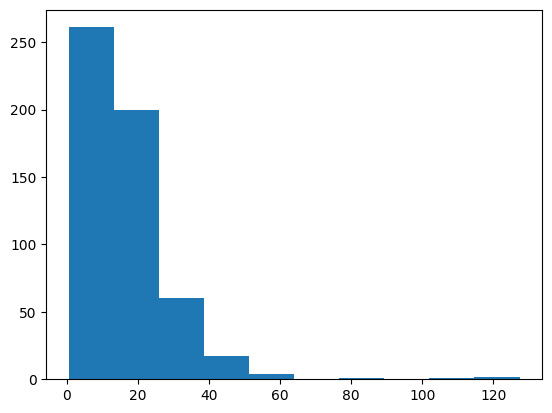

In [91]:
plt.hist(haversine_errors)

## Smart split

In [92]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Step 1: Get unique loc_keys with coordinates
loc_df = dl.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()

# Step 2: Cluster them spatially (e.g., into 20 regions)
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
loc_df["region"] = kmeans.fit_predict(loc_df[["Latitude", "Longitude"]])

# Step 3: Stratified train/test split by region
train_loc_keys, test_loc_keys = train_test_split(
    loc_df["loc_key"], test_size=0.2, stratify=loc_df["region"], random_state=42
)


In [108]:
dl_agg3 = dl_agg2.copy()


In [109]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Get loc_keys and coordinates
loc_df = dl_agg3[["loc_key", "Latitude", "Longitude"]].drop_duplicates()

# Cluster loc_keys into spatial regions
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
loc_df["region"] = kmeans.fit_predict(loc_df[["Latitude", "Longitude"]])

# Stratified split based on region (ensures spatial balance)
train_loc_keys, test_loc_keys = train_test_split(
    loc_df["loc_key"], test_size=0.2, stratify=loc_df["region"], random_state=42
)

print(f"✅ Train loc_keys: {len(train_loc_keys)}, Test loc_keys: {len(test_loc_keys)}")


✅ Train loc_keys: 2184, Test loc_keys: 546


In [110]:
dl_train = dl_agg3[dl_agg3["loc_key"].isin(train_loc_keys)].reset_index(drop=True)
dl_test = dl_agg3[dl_agg3["loc_key"].isin(test_loc_keys)].reset_index(drop=True)

# Extract features and targets
X_train = dl_train.drop(columns=["Latitude", "Longitude", "loc_key"])
y_train = dl_train[["Latitude", "Longitude"]]

X_test = dl_test.drop(columns=["Latitude", "Longitude", "loc_key"])
y_test = dl_test[["Latitude", "Longitude"]]

print(f"✅ DL train samples: {len(dl_train)}, DL test samples: {len(dl_test)}")


✅ DL train samples: 2184, DL test samples: 546


In [111]:
from xgboost import XGBRegressor

# Define and train DL model
dl_model2 = XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)

dl_model2.fit(X_train, y_train)

# Predict
y_pred = dl_model2.predict(X_test)


In [112]:
haversine_errors_dl = vectorized_haversine(
    y_test["Latitude"].values,
    y_test["Longitude"].values,
    y_pred[:, 0],
    y_pred[:, 1]
)

print(f"📡 DL (spatial split) Haversine RMSE: {np.sqrt(np.mean(haversine_errors_dl ** 2)):.2f} m")
print(f"Mean Error: {np.mean(haversine_errors_dl):.2f} m")
print(f"Median Error: {np.median(haversine_errors_dl):.2f} m")
print(f"Max Error: {np.max(haversine_errors_dl):.2f} m")


📡 DL (spatial split) Haversine RMSE: 21.22 m
Mean Error: 17.17 m
Median Error: 13.65 m
Max Error: 90.39 m


In [172]:
ul_train = ul_agg[ul_agg["loc_key"].isin(train_loc_keys)].reset_index(drop=True)
ul_test = ul_agg[ul_agg["loc_key"].isin(test_loc_keys)].reset_index(drop=True)

X_train_ul = ul_train.drop(columns=["Latitude", "Longitude", "loc_key"])
X_test_ul = ul_test.drop(columns=["Latitude", "Longitude", "loc_key"])
y_train_ul = ul_train[["Latitude", "Longitude"]]
y_test_ul = ul_test[["Latitude", "Longitude"]]

print(f"✅ UL train: {len(ul_train)}, UL test: {len(ul_test)}")


✅ UL train: 2039, UL test: 508


In [99]:
sc_train = sc_agg[sc_agg["loc_key"].isin(train_loc_keys)].reset_index(drop=True)
sc_test = sc_agg[sc_agg["loc_key"].isin(test_loc_keys)].reset_index(drop=True)

X_train_sc = sc_train.drop(columns=["Latitude", "Longitude", "loc_key"])
X_test_sc = sc_test.drop(columns=["Latitude", "Longitude", "loc_key"])
y_train_sc = sc_train[["Latitude", "Longitude"]]
y_test_sc = sc_test[["Latitude", "Longitude"]]

print(f"✅ SC train: {len(sc_train)}, SC test: {len(sc_test)}")


✅ SC train: 2151, SC test: 538


In [100]:
from xgboost import XGBRegressor

ul_model = XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)

ul_model.fit(X_train_ul, y_train_ul)

# Predict
y_pred_ul = ul_model.predict(X_test_ul)

# Evaluate
haversine_errors_ul = vectorized_haversine(
    y_test_ul["Latitude"].values,
    y_test_ul["Longitude"].values,
    y_pred_ul[:, 0],
    y_pred_ul[:, 1]
)

print(f"📶 UL (spatial split) Haversine RMSE: {np.sqrt(np.mean(haversine_errors_ul ** 2)):.2f} m")
print(f"Mean Error: {np.mean(haversine_errors_ul):.2f} m")
print(f"Median Error: {np.median(haversine_errors_ul):.2f} m")
print(f"Max Error: {np.max(haversine_errors_ul):.2f} m")


📶 UL (spatial split) Haversine RMSE: 60.45 m
Mean Error: 46.05 m
Median Error: 36.28 m
Max Error: 263.78 m


In [101]:
sc_model = XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)

sc_model.fit(X_train_sc, y_train_sc)

# Predict
y_pred_sc = sc_model.predict(X_test_sc)

# Evaluate
haversine_errors_sc = vectorized_haversine(
    y_test_sc["Latitude"].values,
    y_test_sc["Longitude"].values,
    y_pred_sc[:, 0],
    y_pred_sc[:, 1]
)

print(f"📡 SC (spatial split) Haversine RMSE: {np.sqrt(np.mean(haversine_errors_sc ** 2)):.2f} m")
print(f"Mean Error: {np.mean(haversine_errors_sc):.2f} m")
print(f"Median Error: {np.median(haversine_errors_sc):.2f} m")
print(f"Max Error: {np.max(haversine_errors_sc):.2f} m")


📡 SC (spatial split) Haversine RMSE: 65.22 m
Mean Error: 42.35 m
Median Error: 30.97 m
Max Error: 597.38 m


In [102]:
dl_errors = vectorized_haversine(
    y_test["Latitude"].values, y_test["Longitude"].values,
    y_pred[:, 0], y_pred[:, 1]
)

# Attach loc_key and error
dl_test_error_df = dl_test.copy()
dl_test_error_df["pred_lat"] = y_pred[:, 0]
dl_test_error_df["pred_lon"] = y_pred[:, 1]
dl_test_error_df["error_m"] = dl_errors
dl_test_error_df = dl_test_error_df.sort_values("error_m", ascending=False)

# Top 5 worst predictions
print(dl_test_error_df[["loc_key", "Latitude", "Longitude", "pred_lat", "pred_lon", "error_m"]].head(5))


               loc_key  Latitude  Longitude   pred_lat   pred_lon    error_m
0     41.09902_29.0261  41.09902   29.02610  41.099621  29.026825  90.386929
500   41.10769_29.0197  41.10769   29.01970  41.107155  29.019213  72.098826
23   41.10108_29.01983  41.10108   29.01983  41.101685  29.019632  69.207459
30   41.10235_29.02442  41.10235   29.02442  41.102478  29.023623  68.343075
487  41.10755_29.01922  41.10755   29.01922  41.106945  29.019287  67.659817


In [103]:
worst_keys = dl_test_error_df.head(5)["loc_key"].tolist()

# Filter original `dl` before aggregation (row-level data)
worst_dl_rows = dl[dl["loc_key"].isin(worst_keys)].copy()

print(f"Found {len(worst_dl_rows)} raw DL rows for top-5 error loc_keys")
worst_dl_rows.head()


Found 8 raw DL rows for top-5 error loc_keys


,Latitude,Longitude,NR_UE_Throughput_PDCP_DL,NR_UE_PCI_0,NR_UE_RB_Num_DL_0,NR_UE_Pathloss_DL_0,App_Throughput_DL,NR_UE_Power_Tx_PUSCH_0,NR_UE_RSRP_0,NR_UE_BLER_DL_0,...,NR_UE_Nbr_PCI_1_rsrp_weighted,NR_UE_Nbr_PCI_2_distance,NR_UE_Nbr_PCI_2_bearing,NR_UE_Nbr_PCI_2_angle_offset,NR_UE_Nbr_PCI_2_cos_offset,NR_UE_Nbr_PCI_2_rsrp_weighted,wcentroid_lat_pred,wcentroid_lon_pred,vcentroid_lat_pred,vcentroid_lon_pred
1354,41.10769,29.01970,NaN,40,NaN,NaN,NaN,NaN,-116.7,NaN,...,97.314980,724.796932,289.920615,50.079385,0.641726,-74.311827,41.105459,29.023184,41.107827,29.019743
1355,41.10769,29.01970,NaN,40,NaN,NaN,NaN,NaN,-117.3,NaN,...,96.635644,724.796932,289.920615,50.079385,0.641726,-76.493694,41.105461,29.023063,41.107791,29.019766
1371,41.10755,29.01922,NaN,23,NaN,NaN,NaN,NaN,-115.3,NaN,...,-109.022352,NaN,NaN,NaN,NaN,NaN,41.106919,29.022473,41.107479,29.019312
1372,41.10755,29.01922,NaN,23,NaN,NaN,NaN,NaN,-115.6,NaN,...,-111.088237,NaN,NaN,NaN,NaN,NaN,41.106915,29.022468,41.107474,29.019343
1666,41.10108,29.01983,NaN,68,NaN,NaN,NaN,NaN,-114.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.105696,29.023380,41.100849,29.019594


In [104]:
worst_dl_rows.to_csv("worst_dl_rows.csv")

## Dl-in nazi ile oynayiram


In [105]:
# 6. Filter by new geometry/signal constraints
dl2 = dl[(dl["NR_UE_PCI_0_cos_offset"] >= 0.5) & (dl["NR_UE_RSRP_0"] >= -120)]

# 7. Aggregate into dl_agg4
agg_funcs = ["mean", "std", "min", "max", "count"]
dl_agg4 = dl2.groupby("loc_key").agg({col: agg_funcs for col in DL_FEATURES})
dl_agg4.columns = [f"{col}_{stat}" for col, stat in dl_agg4.columns]
dl_agg4 = dl_agg4.reset_index()

In [106]:
# Add GT and centroid
latlon_df = dl.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()
dl_agg4 = dl_agg4.merge(latlon_df, on="loc_key", how="left")

if "wcentroid_lat_pred" in dl.columns:
    centroid_preds = dl.groupby("loc_key")[["wcentroid_lat_pred", "wcentroid_lon_pred"]].mean().reset_index()
    dl_agg4 = dl_agg4.merge(centroid_preds, on="loc_key", how="left")

print(f"✅ DL_AGG4 shape: {dl_agg4.shape}")

✅ DL_AGG4 shape: (1706, 110)


In [107]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import numpy as np

# 1. Spatial loc_key split using KMeans
loc_df = dl_agg4[["loc_key", "Latitude", "Longitude"]].drop_duplicates()
kmeans = KMeans(n_clusters=20, random_state=42)
loc_df["region"] = kmeans.fit_predict(loc_df[["Latitude", "Longitude"]])

train_loc_keys, test_loc_keys = train_test_split(
    loc_df["loc_key"], test_size=0.2, stratify=loc_df["region"], random_state=42
)

# 2. Split full dataset by loc_key
dl_train3 = dl_agg4[dl_agg4["loc_key"].isin(train_loc_keys)].reset_index(drop=True)
dl_test3 = dl_agg4[dl_agg4["loc_key"].isin(test_loc_keys)].reset_index(drop=True)

X_train = dl_train3.drop(columns=["Latitude", "Longitude", "loc_key"])
y_train = dl_train3[["Latitude", "Longitude"]]
X_test = dl_test3.drop(columns=["Latitude", "Longitude", "loc_key"])
y_test = dl_test3[["Latitude", "Longitude"]]

# 3. Train XGBoost model
dl_model3 = XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)
dl_model3.fit(X_train, y_train)
y_pred = dl_model3.predict(X_test)

# 4. Evaluate with Haversine
def vectorized_haversine(lat1, lon1, lat2, lon2):
    R = 6371000
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

errors = vectorized_haversine(
    y_test["Latitude"].values,
    y_test["Longitude"].values,
    y_pred[:, 0],
    y_pred[:, 1]
)

print(f"📡 DL Agg4 (filtered) RMSE: {np.sqrt(np.mean(errors ** 2)):.2f} m")
print(f"Mean Error: {np.mean(errors):.2f} m")
print(f"Median Error: {np.median(errors):.2f} m")
print(f"Max Error: {np.max(errors):.2f} m")


📡 DL Agg4 (filtered) RMSE: 70.32 m
Mean Error: 49.17 m
Median Error: 34.92 m
Max Error: 371.78 m


## Downlink evvelki kimi zordu ele. UL-in trainie baxaq

In [113]:
# UL logic
ul_train2 = ul_agg[
    (ul_agg["loc_key"].isin(train_loc_keys)) |
    (~ul_agg["loc_key"].isin(train_loc_keys + test_loc_keys))
].copy()

ul_test2 = ul_agg[ul_agg["loc_key"].isin(test_loc_keys)].copy()


In [114]:
print(ul_train.shape)
print(ul_test.shape)

(1978, 80)
(494, 80)


In [121]:
UL_RSRP_THRESHOLD = -130  # lower than DL
UL_SINR_THRESHOLD = -7    # lower than DL


In [122]:
def is_ul_row_bad(row):
    weak_serving = pd.isna(row["NR_UE_RSRP_0"]) and pd.isna(row["NR_UE_SINR_0"]) and pd.isna(row["NR_UE_RSRQ_0"])
    no_neighbors = pd.isna(row["NR_UE_Nbr_RSRP_0"]) and pd.isna(row["NR_UE_Nbr_RSRP_1"])
    no_throughput = pd.isna(row["App_Throughput_UL"]) and pd.isna(row["NR_UE_Throughput_RLC_UL"])
    
    if weak_serving and no_neighbors and no_throughput:
        return True

    if pd.notna(row["NR_UE_RSRP_0"]) and pd.notna(row["NR_UE_SINR_0"]):
        if (row["NR_UE_RSRP_0"] < -130) and (row["NR_UE_SINR_0"] < -7):
            return True

    return False


In [117]:
ul_filtered["bad_signal"] = ul_filtered.apply(is_ul_row_bad, axis=1)
ul_filtered = ul_filtered[~ul_filtered["bad_signal"]].copy()
ul_filtered.drop(columns="bad_signal", inplace=True)


In [123]:
# Apply logic
ul_filtered["bad_signal"] = ul_filtered.apply(is_ul_row_bad, axis=1)

# Extract bad rows
bad_rows = ul_filtered[ul_filtered["bad_signal"]].copy()

# Print summary stats
print(f"❌ Dropped UL rows: {len(bad_rows)} / {len(ul_filtered)} total")
print("\n📉 Dropped rows summary (RSRP & SINR):")
print(bad_rows[["NR_UE_RSRP_0", "NR_UE_SINR_0", "App_Throughput_UL", "NR_UE_Nbr_RSRP_0"]].describe())

# Drop from main dataset
ul_filtered = ul_filtered[~ul_filtered["bad_signal"]].copy()
ul_filtered.drop(columns="bad_signal", inplace=True)


❌ Dropped UL rows: 6 / 12549 total

📉 Dropped rows summary (RSRP & SINR):
       NR_UE_RSRP_0  NR_UE_SINR_0  App_Throughput_UL  NR_UE_Nbr_RSRP_0
count      6.000000      6.000000                0.0          4.000000
mean    -134.883333    -13.066667                NaN       -126.725000
std        3.460877      3.506945                NaN          3.565927
min     -138.500000    -19.900000                NaN       -132.000000
25%     -137.925000    -13.025000                NaN       -127.350000
50%     -135.000000    -11.900000                NaN       -125.200000
75%     -132.300000    -11.300000                NaN       -124.575000
max     -130.500000    -10.200000                NaN       -124.500000


In [124]:
ul_filtered = convert_pci(ul_filtered)


In [125]:
for pci_base in ["NR_UE_PCI_0", "NR_UE_Nbr_PCI_0", "NR_UE_Nbr_PCI_1"]:
    if f"{pci_base}_lat" in ul_filtered.columns:
        ul_filtered = apply_geometry_features(ul_filtered, pci_base)


In [126]:
ul_pci_rsrp_map = {
    "NR_UE_PCI_0": "NR_UE_RSRP_0",
    "NR_UE_Nbr_PCI_0": "NR_UE_Nbr_RSRP_0",
    "NR_UE_Nbr_PCI_1": "NR_UE_Nbr_RSRP_1",
}

ul_filtered["wcentroid_lat_pred"], ul_filtered["wcentroid_lon_pred"] = estimate_weighted_centroid(ul_filtered, ul_pci_rsrp_map)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:19: RuntimeWarning: invalid value encountered in divide
  lat_pred = np.where(weight_sum != 0, lat_sum / weight_sum, np.nan)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:20: RuntimeWarning: invalid value encountered in divide
  lon_pred = np.where(weight_sum != 0, lon_sum / weight_sum, np.nan)


In [127]:
# Aggregation functions
agg_funcs = ["mean", "std", "min", "max", "count"]

# Perform aggregation on signal features
ul_agg = ul_filtered.groupby("loc_key").agg({col: agg_funcs for col in UL_FEATURES})

# Flatten multi-level columns like "NR_UE_RSRP_0_mean"
ul_agg.columns = [f"{col}_{stat}" for col, stat in ul_agg.columns]
ul_agg = ul_agg.reset_index()

# Restore original coordinates from first observation per loc_key
lat_lon = ul_filtered.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()
ul_agg = pd.merge(ul_agg, lat_lon, on="loc_key", how="left")

# Also aggregate weighted centroid predictions (optional but helpful)
ul_pred_cols = ["wcentroid_lat_pred", "wcentroid_lon_pred"]
pred_agg = ul_filtered.groupby("loc_key")[ul_pred_cols].mean().reset_index()
ul_agg = pd.merge(ul_agg, pred_agg, on="loc_key", how="left")

print(f"✅ Final aggregated UL shape: {ul_agg.shape}")


✅ Final aggregated UL shape: (2547, 80)


In [128]:
ul_train = ul_agg[ul_agg["loc_key"].isin(train_loc_keys)].reset_index(drop=True)
ul_test = ul_agg[ul_agg["loc_key"].isin(test_loc_keys)].reset_index(drop=True)

X_train_ul = ul_train.drop(columns=["Latitude", "Longitude", "loc_key"])
X_test_ul = ul_test.drop(columns=["Latitude", "Longitude", "loc_key"])
y_train_ul = ul_train[["Latitude", "Longitude"]]
y_test_ul = ul_test[["Latitude", "Longitude"]]

print(f"✅ UL train: {len(ul_train)}, UL test: {len(ul_test)}")


✅ UL train: 2039, UL test: 508


In [129]:
from xgboost import XGBRegressor

ul_model = XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)

ul_model.fit(X_train_ul, y_train_ul)

# Predict
y_pred_ul = ul_model.predict(X_test_ul)

# Evaluate
haversine_errors_ul = vectorized_haversine(
    y_test_ul["Latitude"].values,
    y_test_ul["Longitude"].values,
    y_pred_ul[:, 0],
    y_pred_ul[:, 1]
)

print(f"📶 UL (spatial split) Haversine RMSE: {np.sqrt(np.mean(haversine_errors_ul ** 2)):.2f} m")
print(f"Mean Error: {np.mean(haversine_errors_ul):.2f} m")
print(f"Median Error: {np.median(haversine_errors_ul):.2f} m")
print(f"Max Error: {np.max(haversine_errors_ul):.2f} m")


📶 UL (spatial split) Haversine RMSE: 74.71 m
Mean Error: 50.45 m
Median Error: 36.20 m
Max Error: 488.47 m


In [130]:
# y_test_ul: true coords
# y_pred_ul: predicted coords from model

def vectorized_haversine(lat1, lon1, lat2, lon2):
    R = 6371000
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# Compute errors
errors_ul = vectorized_haversine(
    y_test_ul["Latitude"].values,
    y_test_ul["Longitude"].values,
    y_pred_ul[:, 0],
    y_pred_ul[:, 1]
)

# Combine into dataframe
ul_error_df = pd.DataFrame({
    "loc_key": ul_test["loc_key"].values,
    "Latitude": y_test_ul["Latitude"].values,
    "Longitude": y_test_ul["Longitude"].values,
    "pred_lat": y_pred_ul[:, 0],
    "pred_lon": y_pred_ul[:, 1],
    "error_m": errors_ul
})

# Sort and show top 10 worst
ul_worst = ul_error_df.sort_values(by="error_m", ascending=False).head(10)
print(ul_worst)


               loc_key  Latitude  Longitude   pred_lat   pred_lon     error_m
352   41.1068_29.02611  41.10680   29.02611  41.103020  29.023140  488.466170
335  41.10675_29.02611  41.10675   29.02611  41.103020  29.023140  483.690121
0     41.09902_29.0261  41.09902   29.02610  41.101624  29.022427  422.511579
15   41.10095_29.02037  41.10095   29.02037  41.103020  29.023140  326.879041
14   41.10073_29.02089  41.10073   29.02089  41.103020  29.023140  316.826425
450  41.10755_29.01922  41.10755   29.01922  41.104946  29.018513  295.565692
1    41.09911_29.02464  41.09911   29.02464  41.100800  29.022415  264.628129
2    41.09921_29.02684  41.09921   29.02684  41.100315  29.024069  262.676582
372  41.10699_29.02152  41.10699   29.02152  41.104866  29.022648  254.268177
456  41.10764_29.01952  41.10764   29.01952  41.105370  29.019754  253.237709


In [131]:
# Step 1: Get worst loc_keys
worst_keys = ul_worst["loc_key"].values

# Step 2: Pull from your aggregated UL features
worst_features = ul_agg[ul_agg["loc_key"].isin(worst_keys)].copy()

# Optional: include only most critical signal/geometry features
cols_of_interest = [
    "NR_UE_RSRP_0_mean", "NR_UE_SINR_0_mean", "NR_UE_RSRQ_0_mean",
    "NR_UE_Nbr_RSRP_0_mean", "NR_UE_Nbr_RSRP_1_mean",
    "App_Throughput_UL_mean", "NR_UE_Throughput_RLC_UL_mean",
    "wcentroid_lat_pred", "wcentroid_lon_pred"
]

# Display these for inspection
display_cols = ["loc_key"] + [col for col in cols_of_interest if col in worst_features.columns]
print(worst_features[display_cols].round(2))


                loc_key  NR_UE_RSRP_0_mean  NR_UE_SINR_0_mean  \
0      41.09902_29.0261            -131.60              -6.80   
3     41.09911_29.02464            -125.55              -2.75   
5     41.09921_29.02684            -143.50                NaN   
61    41.10073_29.02089                NaN                NaN   
65    41.10095_29.02037                NaN                NaN   
1724  41.10675_29.02611                NaN                NaN   
1822   41.1068_29.02611                NaN                NaN   
1905  41.10699_29.02152                NaN                NaN   
2274  41.10755_29.01922            -119.75              -8.95   
2316  41.10764_29.01952            -116.70              -6.60   

      NR_UE_RSRQ_0_mean  NR_UE_Nbr_RSRP_0_mean  NR_UE_Nbr_RSRP_1_mean  \
0                 -19.9                    NaN                    NaN   
3                 -15.2                    NaN                    NaN   
5                 -31.6                    NaN                   

In [132]:
def is_ul_unusable(row):
    if row["App_Throughput_UL"] == 0 and row["NR_UE_Throughput_RLC_UL"] < 1:
        return True
    if pd.isna(row["NR_UE_RSRP_0"]) and pd.isna(row["NR_UE_SINR_0"]):
        return True
    if pd.notna(row["NR_UE_RSRP_0"]) and row["NR_UE_RSRP_0"] < -130:
        return True
    return False


In [133]:
ul_filtered["ul_quality_score"] = (
    ul_filtered["NR_UE_RSRP_0"].clip(-140, -90).fillna(-140) +
    ul_filtered["NR_UE_SINR_0"].clip(-10, 30).fillna(-10) +
    ul_filtered["NR_UE_Throughput_RLC_UL"].fillna(0)
)


In [138]:
ul_filtered["keep"] = ul_filtered.apply(is_ul_unusable, axis=1)
ul_filtered = ul_filtered[ul_filtered["keep"]].copy().drop(columns="keep")

print(f"✅ Remaining usable UL rows: {len(ul_filtered)}")

✅ Remaining usable UL rows: 7240


In [134]:
print(f"✅ Remaining usable UL rows: {len(ul_filtered)}")

✅ Remaining usable UL rows: 12543


In [139]:
from collections import defaultdict

# Re-aggregate as before
agg_funcs = ["mean", "std", "min", "max", "count"]

ul_agg3 = ul_filtered.groupby("loc_key").agg({col: agg_funcs for col in UL_FEATURES})
ul_agg3.columns = [f"{col}_{stat}" for col, stat in ul_agg3.columns]
ul_agg3 = ul_agg3.reset_index()

# Restore GT coordinates
lat_lon = ul_filtered.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()
ul_agg3 = pd.merge(ul_agg3, lat_lon, on="loc_key", how="left")

# Add geometry centroid prediction
if "wcentroid_lat_pred" in ul_filtered.columns:
    centroid_pred = ul_filtered.groupby("loc_key")[["wcentroid_lat_pred", "wcentroid_lon_pred"]].mean().reset_index()
    ul_agg2 = pd.merge(ul_agg3, centroid_pred, on="loc_key", how="left")

print(f"✅ Aggregated UL shape: {ul_agg3.shape}")


✅ Aggregated UL shape: (2398, 78)


In [140]:
# Use DL loc_keys
ul_train = ul_agg2[ul_agg2["loc_key"].isin(train_loc_keys)].reset_index(drop=True)
ul_test = ul_agg2[ul_agg2["loc_key"].isin(test_loc_keys)].reset_index(drop=True)

X_train_ul = ul_train.drop(columns=["Latitude", "Longitude", "loc_key"])
y_train_ul = ul_train[["Latitude", "Longitude"]]
X_test_ul = ul_test.drop(columns=["Latitude", "Longitude", "loc_key"])
y_test_ul = ul_test[["Latitude", "Longitude"]]

print(f"✅ UL train: {len(X_train_ul)}, UL test: {len(X_test_ul)}")


✅ UL train: 1918, UL test: 480


In [141]:
from xgboost import XGBRegressor
import numpy as np

ul_model = XGBRegressor(
    n_estimators=300, max_depth=8, learning_rate=0.1,
    colsample_bytree=0.8, subsample=1.0, random_state=42
)

ul_model.fit(X_train_ul, y_train_ul)
y_pred_ul = ul_model.predict(X_test_ul)

def vectorized_haversine(lat1, lon1, lat2, lon2):
    R = 6371000
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

errors = vectorized_haversine(
    y_test_ul["Latitude"].values, y_test_ul["Longitude"].values,
    y_pred_ul[:, 0], y_pred_ul[:, 1]
)

print(f"📶 UL Model (after improved filtering)")
print(f"RMSE: {np.sqrt(np.mean(errors ** 2)):.2f} m")
print(f"Mean Error: {np.mean(errors):.2f} m")
print(f"Median Error: {np.median(errors):.2f} m")
print(f"Max Error: {np.max(errors):.2f} m")


📶 UL Model (after improved filtering)
RMSE: 239.67 m
Mean Error: 201.99 m
Median Error: 173.38 m
Max Error: 685.65 m


In [ ]:
# Show top 10 worst predictions
worst_scanner_preds = sc_test_eval.sort_values(by="error_m", ascending=False).head(10)
print("\n🔍 Top 10 Worst Scanner Predictions:")
print(worst_scanner_preds)

## Scanner Nazi ile oynayiram

In [155]:
# Step 0: Ensure SCAN_FEATURES is defined
SCAN_FEATURES = [
    'NR_Scan_PCI_SortedBy_RSRP_0', 'NR_Scan_PCI_SortedBy_RSRP_1',
    'NR_Scan_SSB_RSRP_SortedBy_RSRP_0', 'NR_Scan_SSB_RSRP_SortedBy_RSRP_2',
    'NR_Scan_SSB_RSRP_SortedBy_RSRP_1', 'NR_Scan_NR_ARFCN',
    'NR_Scan_SSB_RSRQ_SortedBy_RSRP_0', 'NR_Scan_SSB_SINR_SortedBy_RSRP_0',
    'NR_Scan_SSB_RSRQ_SortedBy_RSRP_2', 'NR_Scan_SSB_SINR_SortedBy_RSRP_2',
    'NR_Scan_PCI_SortedBy_RSRP_2', 'NR_Scan_SSB_SINR_SortedBy_RSRP_1',
    'NR_Scan_SSB_RSRQ_SortedBy_RSRP_1'
]

# Step 1: Filter
sc_filtered = sc[sc["loc_key"].isin(final_loc_keys)].copy()

# Step 2: Drop poor signal rows
scan_signal_cols = [
    'NR_Scan_SSB_RSRP_SortedBy_RSRP_0',
    'NR_Scan_SSB_SINR_SortedBy_RSRP_0',
    'NR_Scan_SSB_RSRQ_SortedBy_RSRP_0'
]
sc_filtered = sc_filtered.dropna(subset=scan_signal_cols, how='all')

# Step 3: PCI columns to Int64
for pci_col in [col for col in SCAN_FEATURES if "PCI" in col]:
    sc_filtered[pci_col] = pd.to_numeric(sc_filtered[pci_col], errors='coerce').astype("Int64")

# Step 4: Convert PCI to geometry
sc_filtered = convert_pci(sc_filtered)

# Step 5: Geometry features
for pci_col in [
    'NR_Scan_PCI_SortedBy_RSRP_0',
    'NR_Scan_PCI_SortedBy_RSRP_1',
    'NR_Scan_PCI_SortedBy_RSRP_2'
]:
    if f"{pci_col}_lat" in sc_filtered.columns:
        sc_filtered = apply_geometry_features(sc_filtered, pci_col)

# Step 6: Weighted centroid
scanner_pci_rsrp_map = {
    "NR_Scan_PCI_SortedBy_RSRP_0": "NR_Scan_SSB_RSRP_SortedBy_RSRP_0",
    "NR_Scan_PCI_SortedBy_RSRP_1": "NR_Scan_SSB_RSRP_SortedBy_RSRP_1",
    "NR_Scan_PCI_SortedBy_RSRP_2": "NR_Scan_SSB_RSRP_SortedBy_RSRP_2"
}
sc_filtered["wcentroid_lat_pred"], sc_filtered["wcentroid_lon_pred"] = estimate_weighted_centroid(
    sc_filtered, scanner_pci_rsrp_map
)

# Step 7: Quality flags
sc_filtered["weak_signal_flag"] = (
    (sc_filtered["NR_Scan_SSB_RSRP_SortedBy_RSRP_0"] < -120) &
    (sc_filtered["NR_Scan_SSB_SINR_SortedBy_RSRP_0"] < -5)
)

sc_filtered["valid_pci_count"] = sc_filtered[
    ["NR_Scan_PCI_SortedBy_RSRP_0", "NR_Scan_PCI_SortedBy_RSRP_1", "NR_Scan_PCI_SortedBy_RSRP_2"]
].notna().sum(axis=1)

for pci_col in [
    'NR_Scan_PCI_SortedBy_RSRP_0',
    'NR_Scan_PCI_SortedBy_RSRP_1',
    'NR_Scan_PCI_SortedBy_RSRP_2'
]:
    sc_filtered[f"{pci_col}_geom_missing"] = sc_filtered[f"{pci_col}_lat"].isna()

print("✅ Scanner data is ready for aggregation.")


✅ Scanner data is ready for aggregation.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:19: RuntimeWarning: invalid value encountered in divide
  lat_pred = np.where(weight_sum != 0, lat_sum / weight_sum, np.nan)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:20: RuntimeWarning: invalid value encountered in divide
  lon_pred = np.where(weight_sum != 0, lon_sum / weight_sum, np.nan)


In [156]:
len(sc_filtered)


16026

In [157]:
existing_scan_features = [col for col in SCAN_FEATURES if col in sc_filtered.columns]

agg_funcs = ["mean", "std", "min", "max", "count"]
sc_agg = sc_filtered.groupby("loc_key").agg({col: agg_funcs for col in existing_scan_features})
sc_agg.columns = [f"{col}_{stat}" for col, stat in sc_agg.columns]
sc_agg = sc_agg.reset_index()


In [158]:
if "Latitude" in sc_filtered.columns and "Longitude" in sc_filtered.columns:
    latlon = sc_filtered.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()
    sc_agg = sc_agg.merge(latlon, on="loc_key", how="left")

if "wcentroid_lat_pred" in sc_filtered.columns and "wcentroid_lon_pred" in sc_filtered.columns:
    preds = sc_filtered.groupby("loc_key")[["wcentroid_lat_pred", "wcentroid_lon_pred"]].mean().reset_index()
    sc_agg = sc_agg.merge(preds, on="loc_key", how="left")


In [161]:
from sklearn.model_selection import train_test_split

# 1. Filter to matching test loc_keys (e.g., spatial test split)
sc_agg["is_test"] = sc_agg["loc_key"].isin(test_loc_keys)

# 2. Split features and target
X_sc = sc_agg.drop(columns=["Latitude", "Longitude", "loc_key", "is_test"], errors="ignore")
y_sc = sc_agg[["Latitude", "Longitude"]]

X_train_sc = X_sc[~sc_agg["is_test"]].reset_index(drop=True)
X_test_sc = X_sc[sc_agg["is_test"]].reset_index(drop=True)
y_train_sc = y_sc[~sc_agg["is_test"]].reset_index(drop=True)
y_test_sc = y_sc[sc_agg["is_test"]].reset_index(drop=True)

print(f"✅ Scanner train: {len(X_train_sc)}, test: {len(X_test_sc)}")


✅ Scanner train: 2151, test: 538


In [162]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from haversine import haversine
import numpy as np
import pandas as pd

# Train two regressors: one for Latitude, one for Longitude
sc_model_lat = XGBRegressor(n_estimators=300, max_depth=8, learning_rate=0.1,
                            colsample_bytree=0.8, subsample=1.0, random_state=42)
sc_model_lon = XGBRegressor(n_estimators=300, max_depth=8, learning_rate=0.1,
                            colsample_bytree=0.8, subsample=1.0, random_state=42)

sc_model_lat.fit(X_train_sc, y_train_sc["Latitude"])
sc_model_lon.fit(X_train_sc, y_train_sc["Longitude"])

# Predict
pred_lat = sc_model_lat.predict(X_test_sc)
pred_lon = sc_model_lon.predict(X_test_sc)
y_pred_sc = np.column_stack([pred_lat, pred_lon])

# Evaluation
sc_test_eval = y_test_sc.copy()
sc_test_eval["pred_lat"] = y_pred_sc[:, 0]
sc_test_eval["pred_lon"] = y_pred_sc[:, 1]

sc_test_eval["error_m"] = sc_test_eval.apply(
    lambda row: haversine((row["Latitude"], row["Longitude"]),
                          (row["pred_lat"], row["pred_lon"])) * 1000,
    axis=1
)

print("📡 Final Scanner Model Evaluation:")
print(f"RMSE: {np.sqrt(mean_squared_error(sc_test_eval['Latitude'], sc_test_eval['pred_lat']) + mean_squared_error(sc_test_eval['Longitude'], sc_test_eval['pred_lon'])) * 111000:.2f} m")
print(f"Mean Error: {sc_test_eval['error_m'].mean():.2f} m")
print(f"Median Error: {sc_test_eval['error_m'].median():.2f} m")
print(f"Max Error: {sc_test_eval['error_m'].max():.2f} m")


📡 Final Scanner Model Evaluation:
RMSE: 70.49 m
Mean Error: 34.75 m
Median Error: 22.82 m
Max Error: 515.79 m


In [164]:
# Rebuild sc_test_eval with loc_key
sc_test_eval = sc_test[["loc_key", "Latitude", "Longitude"]].copy()
sc_test_eval["pred_lat"] = y_pred_sc[:, 0]
sc_test_eval["pred_lon"] = y_pred_sc[:, 1]

# Compute error
from haversine import haversine
sc_test_eval["error_m"] = sc_test_eval.apply(
    lambda row: haversine((row["Latitude"], row["Longitude"]),
                          (row["pred_lat"], row["pred_lon"])) * 1000,
    axis=1
)

# Now extract worst predictions
worst_scanner_preds = sc_test_eval.sort_values("error_m", ascending=False).head(10)
print("🔍 Top 10 Worst Scanner Predictions:")
print(worst_scanner_preds[["loc_key", "Latitude", "Longitude", "pred_lat", "pred_lon", "error_m"]])


🔍 Top 10 Worst Scanner Predictions:
                loc_key  Latitude  Longitude   pred_lat   pred_lon     error_m
0      41.09902_29.0261  41.09902   29.02610  41.102798  29.029671  515.791361
161   41.10236_29.02443  41.10236   29.02443  41.106594  29.026709  508.046112
28    41.09942_29.02293  41.09942   29.02293  41.102539  29.019951  427.317239
1350    41.1055_29.0154  41.10550   29.01540  41.102272  29.017761  409.847500
308    41.1034_29.01722  41.10340   29.01722  41.104176  29.020819  313.617870
1788   41.1065_29.01594  41.10650   29.01594  41.106300  29.018686  231.165004
1253  41.10545_29.01544  41.10545   29.01544  41.103825  29.017115  228.806942
1654  41.10625_29.01559  41.10625   29.01559  41.105793  29.017878  198.286549
6     41.09921_29.02684  41.09921   29.02684  41.100960  29.026848  194.567795
1960  41.10693_29.01666  41.10693   29.01666  41.106026  29.018595  190.756020


In [165]:
# Extract loc_keys of worst predictions
worst_keys = worst_scanner_preds["loc_key"].unique().tolist()

# Retrieve signal + geometry info from sc_filtered (raw pre-agg dataframe)
worst_signals_df = sc_filtered[sc_filtered["loc_key"].isin(worst_keys)].copy()

# Optional: limit to key signal features
cols_of_interest = [
    "loc_key", "Latitude", "Longitude",
    "NR_Scan_SSB_RSRP_SortedBy_RSRP_0",
    "NR_Scan_SSB_SINR_SortedBy_RSRP_0",
    "NR_Scan_SSB_RSRQ_SortedBy_RSRP_0",
    "NR_Scan_SSB_RSRP_SortedBy_RSRP_1",
    "NR_Scan_SSB_SINR_SortedBy_RSRP_1",
    "NR_Scan_SSB_RSRQ_SortedBy_RSRP_1",
    "NR_Scan_SSB_RSRP_SortedBy_RSRP_2",
    "NR_Scan_SSB_SINR_SortedBy_RSRP_2",
    "NR_Scan_SSB_RSRQ_SortedBy_RSRP_2",
    "wcentroid_lat_pred", "wcentroid_lon_pred"
]

# Drop duplicates to avoid overcounting
worst_signals_df = worst_signals_df[cols_of_interest].drop_duplicates(subset=["loc_key"])

# Show the summary table
import pandas as pd
pd.set_option('display.max_columns', None)
print("📡 Worst Scanner Prediction Signal Snapshot:")
display(worst_signals_df)


📡 Worst Scanner Prediction Signal Snapshot:


,loc_key,Latitude,Longitude,NR_Scan_SSB_RSRP_SortedBy_RSRP_0,NR_Scan_SSB_SINR_SortedBy_RSRP_0,NR_Scan_SSB_RSRQ_SortedBy_RSRP_0,NR_Scan_SSB_RSRP_SortedBy_RSRP_1,NR_Scan_SSB_SINR_SortedBy_RSRP_1,NR_Scan_SSB_RSRQ_SortedBy_RSRP_1,NR_Scan_SSB_RSRP_SortedBy_RSRP_2,NR_Scan_SSB_SINR_SortedBy_RSRP_2,NR_Scan_SSB_RSRQ_SortedBy_RSRP_2,wcentroid_lat_pred,wcentroid_lon_pred
2747,41.10693_29.01666,41.10693,29.01666,-118.44,-8.42,-19.66,-118.72,-8.75,-19.95,-119.28,-9.26,-20.39,41.106106,29.025799
2773,41.1065_29.01594,41.10650,29.01594,-102.93,-18.53,-29.35,NaN,NaN,NaN,NaN,NaN,NaN,41.105469,29.027833
2837,41.10625_29.01559,41.10625,29.01559,-122.36,-13.22,-24.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2869,41.1055_29.0154,41.10550,29.01540,-114.96,-12.84,-23.85,NaN,NaN,NaN,NaN,NaN,NaN,41.105469,29.027833
2870,41.10545_29.01544,41.10545,29.01544,-114.44,-12.47,-23.51,NaN,NaN,NaN,NaN,NaN,NaN,41.105469,29.027833
2916,41.1034_29.01722,41.10340,29.01722,-102.36,0.86,-13.24,-106.58,-5.79,-17.46,NaN,NaN,NaN,41.104941,29.024981
3351,41.09902_29.0261,41.09902,29.02610,-94.05,12.92,-10.81,-99.28,3.83,-12.12,-124.54,-16.93,-27.67,NaN,NaN
3377,41.09921_29.02684,41.09921,29.02684,-99.00,3.61,-12.17,-100.59,7.92,-11.26,-123.42,-25.96,-36.59,NaN,NaN
3413,41.09942_29.02293,41.09942,29.02293,-119.47,-10.22,-21.35,NaN,NaN,NaN,NaN,NaN,NaN,41.105469,29.027833
15966,41.10236_29.02443,41.10236,29.02443,-116.73,-13.34,-24.21,NaN,NaN,NaN,NaN,NaN,NaN,41.108086,29.028122


In [ ]:
from haversine import haversine
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

### --- Step 1: Filter valid loc_keys
sc_filtered = sc[sc["loc_key"].isin(final_loc_keys)].copy()
print(f"✅ Initial Scanner rows after loc_key filter: {len(sc_filtered)}")

### --- Step 2: Drop rows with all essential signal values missing
signal_cols = [
    'NR_Scan_SSB_RSRP_SortedBy_RSRP_0',
    'NR_Scan_SSB_SINR_SortedBy_RSRP_0',
    'NR_Scan_SSB_RSRQ_SortedBy_RSRP_0'
]
sc_filtered = sc_filtered.dropna(subset=signal_cols, how='all')
print(f"✅ Scanner rows after signal NaN removal: {len(sc_filtered)}")

### --- Step 3: Ensure PCI columns are numeric
for pci_col in [col for col in SCAN_FEATURES if "PCI" in col]:
    sc_filtered[pci_col] = pd.to_numeric(sc_filtered[pci_col], errors='coerce').astype("Int64")

### --- Step 4: Convert PCI to geometry + apply features
sc_filtered = convert_pci(sc_filtered)

scanner_pci_cols = [
    'NR_Scan_PCI_SortedBy_RSRP_0',
    'NR_Scan_PCI_SortedBy_RSRP_1',
    'NR_Scan_PCI_SortedBy_RSRP_2'
]
for pci_col in scanner_pci_cols:
    if f"{pci_col}_lat" in sc_filtered.columns:
        sc_filtered = apply_geometry_features(sc_filtered, pci_col)

print("✅ Geometry features added to scanner data.")

### --- Step 5: Estimate weighted centroid
scanner_pci_rsrp_map = {
    "NR_Scan_PCI_SortedBy_RSRP_0": "NR_Scan_SSB_RSRP_SortedBy_RSRP_0",
    "NR_Scan_PCI_SortedBy_RSRP_1": "NR_Scan_SSB_RSRP_SortedBy_RSRP_1",
    "NR_Scan_PCI_SortedBy_RSRP_2": "NR_Scan_SSB_RSRP_SortedBy_RSRP_2"
}
sc_filtered["wcentroid_lat_pred"], sc_filtered["wcentroid_lon_pred"] = estimate_weighted_centroid(
    sc_filtered, scanner_pci_rsrp_map
)

### --- Step 6: Add signal count feature
sc_filtered["num_valid_rsrp"] = sc_filtered[
    [
        "NR_Scan_SSB_RSRP_SortedBy_RSRP_0",
        "NR_Scan_SSB_RSRP_SortedBy_RSRP_1",
        "NR_Scan_SSB_RSRP_SortedBy_RSRP_2"
    ]
].notna().sum(axis=1)

### --- Step 7: Aggregate by loc_key
agg_funcs = ["mean", "std", "min", "max", "count"]
scan_cols_v3 = SCAN_FEATURES + ["num_valid_rsrp"]

sc_agg3 = sc_filtered.groupby("loc_key").agg({col: agg_funcs for col in scan_cols_v3})
sc_agg3.columns = [f"{col}_{stat}" for col, stat in sc_agg3.columns]
sc_agg3 = sc_agg3.reset_index()

latlon3 = sc_filtered.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()
centroids3 = sc_filtered.groupby("loc_key")[["wcentroid_lat_pred", "wcentroid_lon_pred"]].mean().reset_index()

sc_agg3 = sc_agg3.merge(latlon3, on="loc_key", how="left")
sc_agg3 = sc_agg3.merge(centroids3, on="loc_key", how="left")
print(f"✅ Aggregated Scanner v3 shape: {sc_agg3.shape}")

### --- Step 8: Train/Test Split
FEATURES_SCANNER3 = [col for col in sc_agg3.columns if col not in [
    "loc_key", "Latitude", "Longitude", "wcentroid_lat_pred", "wcentroid_lon_pred"
]]

X_sc3 = sc_agg3[FEATURES_SCANNER3]
y_sc3 = sc_agg3[["Latitude", "Longitude"]]

X_train_sc3, X_test_sc3, y_train_sc3, y_test_sc3 = train_test_split(
    X_sc3, y_sc3, test_size=0.2, random_state=42
)

### --- Step 9: Train XGBoost Model
sc_model3 = XGBRegressor(
    n_estimators=300, max_depth=8, learning_rate=0.1,
    colsample_bytree=0.8, subsample=1.0, random_state=42
)
sc_model3.fit(X_train_sc3, y_train_sc3)

### --- Step 10: Predict + Fallback for low-signal samples
y_pred_sc3 = sc_model3.predict(X_test_sc3)
sc_test3 = sc_agg3.iloc[X_test_sc3.index].copy()
sc_test3["pred_lat"] = y_pred_sc3[:, 0]
sc_test3["pred_lon"] = y_pred_sc3[:, 1]

fallback_mask = sc_test3["num_valid_rsrp_mean"] < 2
sc_test3.loc[fallback_mask, "pred_lat"] = sc_test3.loc[fallback_mask, "wcentroid_lat_pred"]
sc_test3.loc[fallback_mask, "pred_lon"] = sc_test3.loc[fallback_mask, "wcentroid_lon_pred"]

### --- Step 11: Evaluate
sc_test3["error_m"] = sc_test3.apply(
    lambda row: haversine((row["Latitude"], row["Longitude"]),
                          (row["pred_lat"], row["pred_lon"])) * 1000,
    axis=1
)

print("📡 Final Scanner Model v3 (with fallback) Evaluation:")
print(f"RMSE: {np.sqrt(np.mean(sc_test3['error_m'] ** 2)):.2f} m")
print(f"Mean Error: {sc_test3['error_m'].mean():.2f} m")
print(f"Median Error: {sc_test3['error_m'].median():.2f} m")
print(f"Max Error: {sc_test3['error_m'].max():.2f} m")


✅ Initial Scanner rows after loc_key filter: 54528
✅ Scanner rows after signal NaN removal: 16026
✅ Geometry features added to scanner data.
✅ Aggregated Scanner v3 shape: (2689, 75)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:19: RuntimeWarning: invalid value encountered in divide
  lat_pred = np.where(weight_sum != 0, lat_sum / weight_sum, np.nan)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:20: RuntimeWarning: invalid value encountered in divide
  lon_pred = np.where(weight_sum != 0, lon_sum / weight_sum, np.nan)


📡 Final Scanner Model v3 (with fallback) Evaluation:
RMSE: 165.91 m
Mean Error: 71.08 m
Median Error: 30.30 m
Max Error: 1041.74 m


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\1325252876.py:98: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[41.1058417  41.10600228 41.10628927 41.10641183 41.10601821 41.10567618
 41.1054694  41.10444211 41.1062089  41.10715251 41.10590741 41.10575485
 41.1070873  41.1073413  41.10471507         nan 41.10710752 41.1073413
 41.10627211 41.10631873 41.10495347 41.10542726 41.10590938         nan
 41.1073413  41.10594045 41.1056271          nan 41.10496591 41.10481334
 41.1073413  41.10518074 41.10508479 41.1054694  41.1062654  41.10469872
 41.10721633 41.1052302          nan 41.10607421 41.10627748 41.10615916
 41.10689051 41.1044765  41.1070873  41.10567751 41.10568155 41.10592314
 41.10672999 41.10710297 41.1064611  41.10439243 41.10499299 41.1054694
         nan         nan 41.10573292 41.1054694  41.1056473  41.10658623
 41.1054694  41.10575421 41.10604674 41.1054694  41.1054694  41.10458051
 41

In [167]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# -------- Step 1: Signal Count Feature --------
sc_filtered["num_valid_rsrp"] = sc_filtered[
    [
        "NR_Scan_SSB_RSRP_SortedBy_RSRP_0",
        "NR_Scan_SSB_RSRP_SortedBy_RSRP_1",
        "NR_Scan_SSB_RSRP_SortedBy_RSRP_2"
    ]
].notna().sum(axis=1)

# -------- Step 2: Group & Aggregate --------
agg_features = SCAN_FEATURES + ["num_valid_rsrp"]
agg_funcs = ["mean", "std", "min", "max", "count"]

sc_agg3 = sc_filtered.groupby("loc_key").agg({col: agg_funcs for col in agg_features})
sc_agg3.columns = [f"{col}_{stat}" for col, stat in sc_agg3.columns]
sc_agg3 = sc_agg3.reset_index()

# -------- Step 3: Add Real Coordinates + Weighted Centroid --------
if "Latitude" in sc_filtered.columns and "Longitude" in sc_filtered.columns:
    latlon = sc_filtered.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()
    sc_agg3 = sc_agg3.merge(latlon, on="loc_key", how="left")

if "wcentroid_lat_pred" in sc_filtered.columns and "wcentroid_lon_pred" in sc_filtered.columns:
    preds = sc_filtered.groupby("loc_key")[["wcentroid_lat_pred", "wcentroid_lon_pred"]].mean().reset_index()
    sc_agg3 = sc_agg3.merge(preds, on="loc_key", how="left")

# -------- Step 4: Apply Spatial Train/Test Split Based on loc_key --------
sc_agg3["is_test"] = sc_agg3["loc_key"].isin(test_loc_keys)

X_sc3 = sc_agg3.drop(columns=["Latitude", "Longitude", "loc_key", "is_test"], errors="ignore")
y_sc3 = sc_agg3[["Latitude", "Longitude"]]

X_train_sc3 = X_sc3[~sc_agg3["is_test"]].reset_index(drop=True)
X_test_sc3 = X_sc3[sc_agg3["is_test"]].reset_index(drop=True)
y_train_sc3 = y_sc3[~sc_agg3["is_test"]].reset_index(drop=True)
y_test_sc3 = y_sc3[sc_agg3["is_test"]].reset_index(drop=True)

print(f"✅ Scanner train: {len(X_train_sc3)}, test: {len(X_test_sc3)}")

# -------- Step 5: Model Training --------
sc_model3 = XGBRegressor(n_estimators=300, max_depth=8, learning_rate=0.1, random_state=42)
sc_model3.fit(X_train_sc3, y_train_sc3)

# -------- Step 6: Prediction and Fallback for NaNs --------
y_pred_sc3 = sc_model3.predict(X_test_sc3)

sc_test3 = sc_agg3[sc_agg3["is_test"]].copy().reset_index(drop=True)
sc_test3["pred_lat"] = y_pred_sc3[:, 0]
sc_test3["pred_lon"] = y_pred_sc3[:, 1]

# Fallback: use weighted centroid if any of the predictions are NaN
use_fallback = sc_test3[["pred_lat", "pred_lon"]].isna().any(axis=1)
sc_test3.loc[use_fallback, "pred_lat"] = sc_test3.loc[use_fallback, "wcentroid_lat_pred"]
sc_test3.loc[use_fallback, "pred_lon"] = sc_test3.loc[use_fallback, "wcentroid_lon_pred"]

# -------- Step 7: Haversine Evaluation --------
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371000
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lon2 - lon1)
    a = np.sin(d_phi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(d_lambda / 2.0)**2
    return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

sc_test3["error_m"] = haversine_distance(
    sc_test3["Latitude"], sc_test3["Longitude"],
    sc_test3["pred_lat"], sc_test3["pred_lon"]
)

print("📡 Final Scanner Model Evaluation (with fallback & signal count):")
print(f"RMSE: {np.sqrt(np.mean(sc_test3['error_m'] ** 2)):.2f} m")
print(f"Mean Error: {sc_test3['error_m'].mean():.2f} m")
print(f"Median Error: {sc_test3['error_m'].median():.2f} m")
print(f"Max Error: {sc_test3['error_m'].max():.2f} m")


✅ Scanner train: 2151, test: 538
📡 Final Scanner Model Evaluation (with fallback & signal count):
RMSE: 63.50 m
Mean Error: 40.43 m
Median Error: 29.77 m
Max Error: 558.47 m


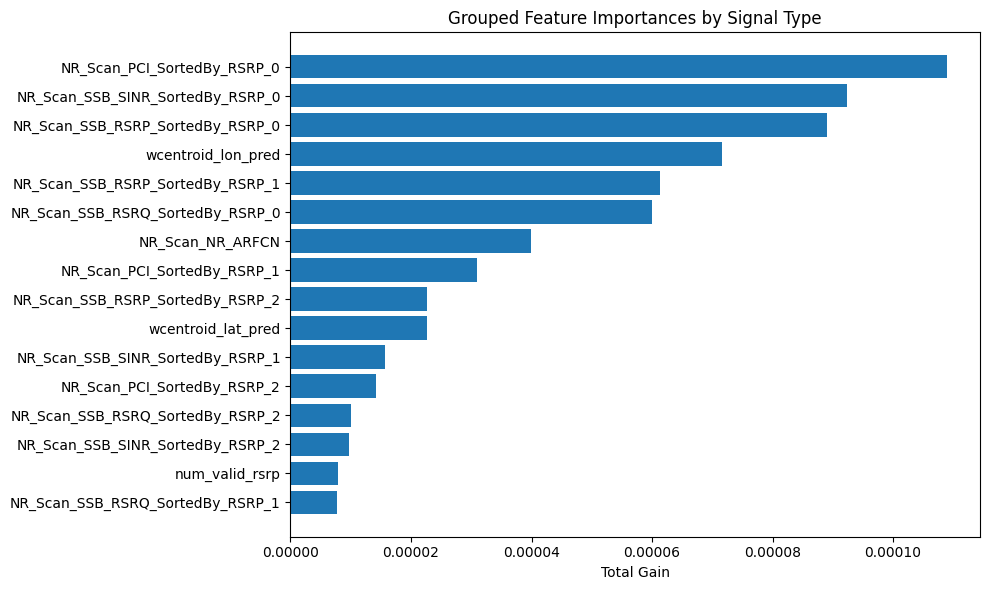

In [168]:
import re
from collections import defaultdict

booster = sc_model3.get_booster()
score_dict = booster.get_score(importance_type='gain')

# Group by base feature name
grouped_scores = defaultdict(float)
for feat, score in score_dict.items():
    base = re.sub(r'_(mean|std|min|max|count)$', '', feat)
    grouped_scores[base] += score

# Convert to DataFrame
grouped_df = pd.DataFrame({
    'feature': list(grouped_scores.keys()),
    'importance': list(grouped_scores.values())
}).sort_values("importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(grouped_df["feature"].iloc[::-1], grouped_df["importance"].iloc[::-1])
plt.title("Grouped Feature Importances by Signal Type")
plt.xlabel("Total Gain")
plt.tight_layout()
plt.show()


In [169]:
def centroid_error(row):
    if pd.isna(row["wcentroid_lat_pred"]): return np.nan
    return haversine(
        (row["Latitude"], row["Longitude"]),
        (row["wcentroid_lat_pred"], row["wcentroid_lon_pred"])
    ) * 1000

sc_filtered["centroid_error_m"] = sc_filtered.apply(centroid_error, axis=1)
print(sc_filtered["centroid_error_m"].describe())


count    11756.000000
mean       130.417189
std        154.004632
min          0.450594
25%         56.709940
50%         97.970514
75%        134.728775
max       1046.076038
Name: centroid_error_m, dtype: float64


In [170]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# ---------------------- STEP 1: SIGNAL COUNT ----------------------
sc_filtered["num_valid_rsrp"] = sc_filtered[
    ["NR_Scan_SSB_RSRP_SortedBy_RSRP_0", "NR_Scan_SSB_RSRP_SortedBy_RSRP_1", "NR_Scan_SSB_RSRP_SortedBy_RSRP_2"]
].notna().sum(axis=1)

# ---------------------- STEP 2: CENTROID ERROR ----------------------
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371000
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lon2 - lon1)
    a = np.sin(d_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(d_lambda/2)**2
    return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

sc_filtered["centroid_error_m"] = haversine_distance(
    sc_filtered["Latitude"], sc_filtered["Longitude"],
    sc_filtered["wcentroid_lat_pred"], sc_filtered["wcentroid_lon_pred"]
)

# ---------------------- STEP 3: AGGREGATION ----------------------
agg_features = SCAN_FEATURES + ["num_valid_rsrp", "centroid_error_m"]
agg_funcs = ["mean", "std", "min", "max", "count"]

sc_agg3 = sc_filtered.groupby("loc_key").agg({col: agg_funcs for col in agg_features})
sc_agg3.columns = [f"{col}_{stat}" for col, stat in sc_agg3.columns]
sc_agg3 = sc_agg3.reset_index()

# Add ground truth coordinates
latlon = sc_filtered.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()
centroids = sc_filtered.groupby("loc_key")[["wcentroid_lat_pred", "wcentroid_lon_pred"]].mean().reset_index()
sc_agg3 = sc_agg3.merge(latlon, on="loc_key", how="left")
sc_agg3 = sc_agg3.merge(centroids, on="loc_key", how="left")

# ---------------------- STEP 4: SPATIAL SPLIT ----------------------
sc_agg3["is_test"] = sc_agg3["loc_key"].isin(test_loc_keys)

X_sc3 = sc_agg3.drop(columns=["Latitude", "Longitude", "loc_key", "is_test",
                              "wcentroid_lat_pred", "wcentroid_lon_pred"], errors="ignore")
y_sc3 = sc_agg3[["Latitude", "Longitude"]]

X_train_sc3 = X_sc3[~sc_agg3["is_test"]].reset_index(drop=True)
X_test_sc3 = X_sc3[sc_agg3["is_test"]].reset_index(drop=True)
y_train_sc3 = y_sc3[~sc_agg3["is_test"]].reset_index(drop=True)
y_test_sc3 = y_sc3[sc_agg3["is_test"]].reset_index(drop=True)

print(f"✅ Scanner train: {len(X_train_sc3)}, test: {len(X_test_sc3)}")

# ---------------------- STEP 5: SAMPLE WEIGHT ----------------------
# Use inverse of centroid error as sample weight
centroid_error_train = sc_agg3[~sc_agg3["is_test"]]["centroid_error_m_mean"].fillna(1000)
sample_weights = 1 / (1 + centroid_error_train)

# ---------------------- STEP 6: TRAIN MODEL ----------------------
sc_model3 = XGBRegressor(
    n_estimators=300, max_depth=8, learning_rate=0.1,
    colsample_bytree=0.8, subsample=1.0, random_state=42
)
sc_model3.fit(X_train_sc3, y_train_sc3, sample_weight=sample_weights)

# ---------------------- STEP 7: PREDICTION & FALLBACK ----------------------
y_pred_sc3 = sc_model3.predict(X_test_sc3)
sc_test3 = sc_agg3[sc_agg3["is_test"]].copy().reset_index(drop=True)

sc_test3["pred_lat"] = y_pred_sc3[:, 0]
sc_test3["pred_lon"] = y_pred_sc3[:, 1]

# Fallback for weak signals
fallback_mask = sc_test3["num_valid_rsrp_mean"] < 2
sc_test3.loc[fallback_mask, "pred_lat"] = sc_test3.loc[fallback_mask, "wcentroid_lat_pred"]
sc_test3.loc[fallback_mask, "pred_lon"] = sc_test3.loc[fallback_mask, "wcentroid_lon_pred"]

# ---------------------- STEP 8: EVALUATION ----------------------
sc_test3["error_m"] = haversine_distance(
    sc_test3["Latitude"], sc_test3["Longitude"],
    sc_test3["pred_lat"], sc_test3["pred_lon"]
)

print("📡 Final Scanner Model v3 (Reweighted & Fallback):")
print(f"RMSE: {np.sqrt(np.mean(sc_test3['error_m'] ** 2)):.2f} m")
print(f"Mean Error: {sc_test3['error_m'].mean():.2f} m")
print(f"Median Error: {sc_test3['error_m'].median():.2f} m")
print(f"Max Error: {sc_test3['error_m'].max():.2f} m")


✅ Scanner train: 2151, test: 538
📡 Final Scanner Model v3 (Reweighted & Fallback):
RMSE: 231.52 m
Mean Error: 134.90 m
Median Error: 62.62 m
Max Error: 1041.73 m


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\1906346347.py:73: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[41.1054694  41.1054694  41.1057426  41.1054694  41.1054694  41.10671086
 41.10652666 41.10610021 41.10496591 41.1054694  41.1054694  41.1080861
 41.10575421 41.10528928 41.10534658 41.10476258 41.1049293  41.10472873
 41.1043417  41.10476434 41.10461931 41.10471507 41.10481334 41.10483814
 41.10508479 41.10485086 41.10595804 41.10510486 41.10505678 41.1054694
 41.10508258 41.10490748 41.1054694  41.1054694  41.1056271  41.10568155
 41.1054694  41.10590613 41.10566914 41.10571607 41.10586713 41.10598542
 41.10587429 41.10592581 41.10612632 41.10567751 41.10605073 41.10624572
 41.1054694  41.10608539 41.10627748 41.1054694  41.10664388 41.10578364
 41.10601821 41.10714839 41.10717124 41.10658623 41.1066307  41.1070873
 41.10711216 41.10714169 41.10715251 41.1070873  41.1070873  41.10714847
 41.

In [171]:
# Predict on training set
y_train_pred_ul = ul_model.predict(X_train_ul)

# Compute Haversine error
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371000
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lon2 - lon1)
    a = np.sin(d_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(d_lambda/2)**2
    return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

train_errors_ul = haversine_distance(
    y_train_ul["Latitude"], y_train_ul["Longitude"],
    y_train_pred_ul[:, 0], y_train_pred_ul[:, 1]
)

# Print training set performance
print("📶 UL Model — Training Set Evaluation:")
print(f"RMSE: {np.sqrt(np.mean(train_errors_ul ** 2)):.2f} m")
print(f"Mean Error: {np.mean(train_errors_ul):.2f} m")
print(f"Median Error: {np.median(train_errors_ul):.2f} m")
print(f"Max Error: {np.max(train_errors_ul):.2f} m")


📶 UL Model — Training Set Evaluation:
RMSE: 167.58 m
Mean Error: 142.32 m
Median Error: 124.11 m
Max Error: 760.72 m


## Settle down


In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from haversine import haversine

# --- 1. Filter relevant UL signals ---
ul_signal_cols = [
    'NR_UE_RSRP_0', 'NR_UE_SINR_0', 'NR_UE_RSRQ_0',
    'NR_UE_Nbr_RSRP_0', 'NR_UE_Nbr_RSRP_1',
    'App_Throughput_UL', 'NR_UE_Throughput_RLC_UL'
]
ul_filtered = ul[ul["loc_key"].isin(final_loc_keys)].copy()
ul_filtered = ul_filtered.dropna(subset=ul_signal_cols, how="all")

# Optional: Remove very weak UL signals
def is_useless_ul_signal(row):
    return (
        pd.isna(row["NR_UE_RSRP_0"]) or row["NR_UE_RSRP_0"] < -140 or
        pd.isna(row["NR_UE_SINR_0"]) or row["NR_UE_SINR_0"] < -10
    )
ul_filtered = ul_filtered[~ul_filtered.apply(is_useless_ul_signal, axis=1)]

# --- 2. Add geometry features based on PCI ---
ul_filtered = convert_pci(ul_filtered)
ul_pci_cols = ["NR_UE_PCI_0", "NR_UE_Nbr_PCI_0", "NR_UE_Nbr_PCI_1"]
for pci_col in ul_pci_cols:
    if f"{pci_col}_lat" in ul_filtered.columns:
        ul_filtered = apply_geometry_features(ul_filtered, pci_col)

# --- 3. Estimate weighted centroid ---
ul_pci_rsrp_map = {
    "NR_UE_PCI_0": "NR_UE_RSRP_0",
    "NR_UE_Nbr_PCI_0": "NR_UE_Nbr_RSRP_0",
    "NR_UE_Nbr_PCI_1": "NR_UE_Nbr_RSRP_1"
}
ul_filtered["wcentroid_lat_pred"], ul_filtered["wcentroid_lon_pred"] = estimate_weighted_centroid(
    ul_filtered, ul_pci_rsrp_map
)

# --- 4. Aggregate features by loc_key ---
agg_funcs = ["mean", "std", "min", "max", "count"]
ul_agg = ul_filtered.groupby("loc_key").agg({col: agg_funcs for col in ul_signal_cols})
ul_agg.columns = [f"{col}_{stat}" for col, stat in ul_agg.columns]
ul_agg = ul_agg.reset_index()

# Add coordinates
latlon = ul_filtered.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()
preds = ul_filtered.groupby("loc_key")[["wcentroid_lat_pred", "wcentroid_lon_pred"]].mean().reset_index()
ul_agg = ul_agg.merge(latlon, on="loc_key", how="left")
ul_agg = ul_agg.merge(preds, on="loc_key", how="left")

# --- 5. Train-test split (spatial) ---
ul_agg["is_test"] = ul_agg["loc_key"].isin(test_loc_keys)

X_ul = ul_agg.drop(columns=["Latitude", "Longitude", "loc_key", "is_test"], errors="ignore")
y_ul = ul_agg[["Latitude", "Longitude"]]

X_train_ul = X_ul[~ul_agg["is_test"]].reset_index(drop=True)
X_test_ul = X_ul[ul_agg["is_test"]].reset_index(drop=True)
y_train_ul = y_ul[~ul_agg["is_test"]].reset_index(drop=True)
y_test_ul = y_ul[ul_agg["is_test"]].reset_index(drop=True)

print(f"✅ UL train: {len(X_train_ul)}, UL test: {len(X_test_ul)}")

# --- 6. Train model ---
ul_model = XGBRegressor(n_estimators=300, max_depth=8, learning_rate=0.1, random_state=42)
ul_model.fit(X_train_ul, y_train_ul)

# --- 7. Evaluate ---
y_pred_ul = ul_model.predict(X_test_ul)
ul_eval_df = y_test_ul.copy()
ul_eval_df["pred_lat"] = y_pred_ul[:, 0]
ul_eval_df["pred_lon"] = y_pred_ul[:, 1]

ul_eval_df["error_m"] = ul_eval_df.apply(
    lambda row: haversine((row["Latitude"], row["Longitude"]),
                          (row["pred_lat"], row["pred_lon"])) * 1000,
    axis=1
)

print("\n📶 UL Model Evaluation (Best Version):")
print(f"RMSE: {np.sqrt(np.mean(ul_eval_df['error_m'] ** 2)):.2f} m")
print(f"Mean Error: {ul_eval_df['error_m'].mean():.2f} m")
print(f"Median Error: {ul_eval_df['error_m'].median():.2f} m")
print(f"Max Error: {ul_eval_df['error_m'].max():.2f} m")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:19: RuntimeWarning: invalid value encountered in divide
  lat_pred = np.where(weight_sum != 0, lat_sum / weight_sum, np.nan)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\395689686.py:20: RuntimeWarning: invalid value encountered in divide
  lon_pred = np.where(weight_sum != 0, lon_sum / weight_sum, np.nan)


✅ UL train: 1973, UL test: 493

📶 UL Model Evaluation (Best Version):
RMSE: 84.04 m
Mean Error: 60.19 m
Median Error: 41.52 m
Max Error: 442.12 m
